# In-situ Data Analysis – South Asian Astrophysics Summer School 2025


**By Ashok Silwal, UAH-Department of Space Science; as0432@uah.edu**


Notes:

- I will use **PySPEDAS** to download the data and **PyTplot** to plot them!

- Only a limited selection of data products and spacecraft are loaded/plotted in this notebook. Therefore, not all available spacecraft, instruments, or data products are demonstrated. For a list of the capabilities, please see the documentation:

PySPEDAS: https://pyspedas.readthedocs.io/

To install the latest version of pyspedas available in PyPI:

In [41]:
!pip install PyTplot

24-Jul-25 20:30:35: C:\Users\USER\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=7>
  return process_handler(cmd, _system_body)

24-Jul-25 20:30:35: C:\Users\USER\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=8>
  return process_handler(cmd, _system_body)

24-Jul-25 20:30:35: C:\Users\USER\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=9>
  return process_handler(cmd, _system_body)



   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----------------- ---------------------- 0.8/1.8 MB 12.3 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.8 MB 7.2 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.8 MB 7.2 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.8 MB 7.2 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.8 MB 7.2 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.8 MB 7.2 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.8 MB 7.2 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.8 MB 7.2 MB/s eta 0:00:01
   ----------------------------------- ---- 1.6/1.8 MB 769.8 kB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 843.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/1.9 MB 3.9 MB/s eta 0:00:01
   ------------------

Get started by importing pyspedas

In [4]:
import pyspedas

## Setting your local data directory

By default, data files are saved in a subfolder of your current working directory; you can change this by setting the `SPEDAS_DATA_DIR` environment variable. Directories for individual missions can also be changed from the default with mission-specific environment variables, e.g., `PSP_DATA_DIR` or `SOLO_DATA_DIR`


In [5]:
import os
#os.environ['SPEDAS_DATA_DIR'] = '/shared/asilwal/data/'

## OMNI

To find the supported load routines and keywords, see the official documentation: https://pyspedas.readthedocs.io/

You can also see the supported options by calling `help` on the load routine you're interested in

In [6]:
help(pyspedas.omni.data)

Help on function load in module pyspedas.projects.omni.load:

load(
    trange=['2013-11-5', '2013-11-6'],
    datatype='1min',
    level='hro',
    prefix='',
    suffix='',
    get_support_data=False,
    get_ignore_data=False,
    varformat=None,
    varnames=[],
    downloadonly=False,
    notplot=False,
    no_update=False,
    time_clip=True,
    force_download=False
)
    Loads OMNI (Combined 1AU IP Data; Magnetic and Solar Indices) data; intended for internal use.

    This function is a core component for data loading but is not meant to be called directly by users.
    Instead, users should utilize the wrapper function `pyspedas.projects.omni.data` to access this functionality.

    Parameters
    ----------
    trange : list of str, optional
        Time range of interest specified as ['starttime', 'endtime'] with the format
        'YYYY-MM-DD' or 'YYYY-MM-DD/hh:mm:ss' to specify more or less than a day.
        default=['2013-11-5', '2013-11-6']
    datatype : str, optiona

To load OMNI data for the full month of March, 2017

In [7]:
pyspedas.omni.data(trange=['2017-03-01', '2017-04-01'],datatype = "1min", time_clip=True)

24-Jul-25 20:18:38: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro_1min/2017/
24-Jul-25 20:18:40: Downloading https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro_1min/2017/omni_hro_1min_20170301_v01.cdf to omni_data/hro_1min/2017/omni_hro_1min_20170301_v01.cdf
24-Jul-25 20:18:44: Download of omni_data/hro_1min/2017/omni_hro_1min_20170301_v01.cdf complete, 8.366 MB in 3.9 sec (2.163 MB/sec) (transfer_normal)


['IMF',
 'PLS',
 'IMF_PTS',
 'PLS_PTS',
 'percent_interp',
 'Timeshift',
 'RMS_Timeshift',
 'RMS_phase',
 'Time_btwn_obs',
 'F',
 'BX_GSE',
 'BY_GSE',
 'BZ_GSE',
 'BY_GSM',
 'BZ_GSM',
 'RMS_SD_B',
 'RMS_SD_fld_vec',
 'flow_speed',
 'Vx',
 'Vy',
 'Vz',
 'proton_density',
 'T',
 'Pressure',
 'E',
 'Beta',
 'Mach_num',
 'Mgs_mach_num',
 'x',
 'y',
 'z',
 'BSN_x',
 'BSN_y',
 'BSN_z',
 'AE_INDEX',
 'AL_INDEX',
 'AU_INDEX',
 'SYM_D',
 'SYM_H',
 'ASY_D',
 'ASY_H',
 'PC_N_INDEX']

To create a figure showing the B-field

Check PyTplot: https://pytplot.readthedocs.io/

In [42]:
from pytplot import tplot

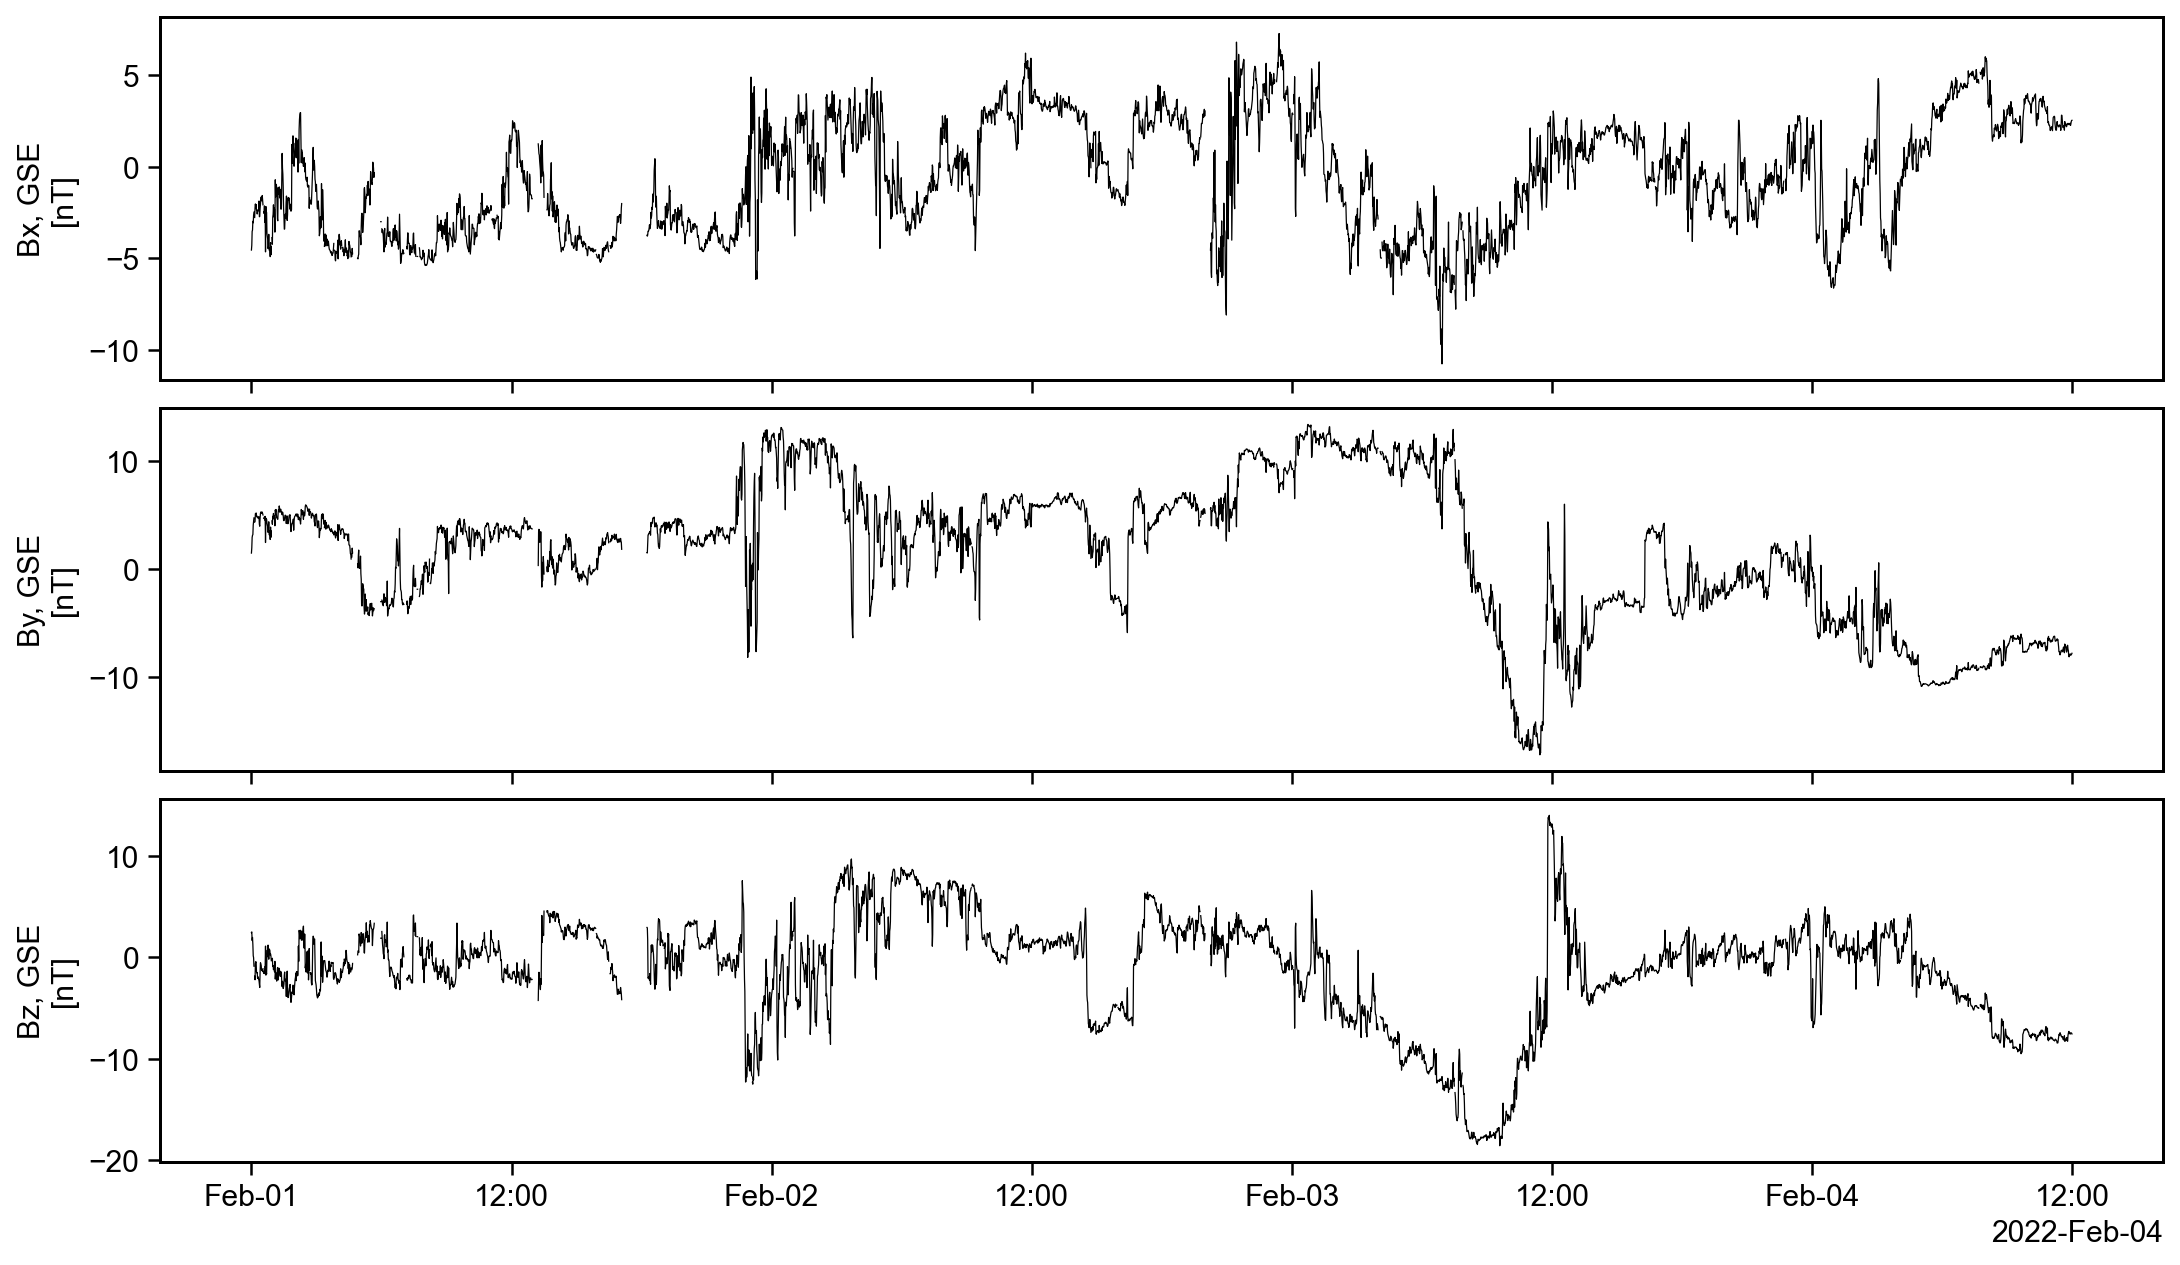

In [75]:
tplot(['BX_GSE','BY_GSE', 'BZ_GSE'])

You can join vector components into a single variable using `join_vec` from `pytplot`

24-Jul-25 20:30:56: join_vec: The new_tvar parameter is deprecated. Please use newname instead.


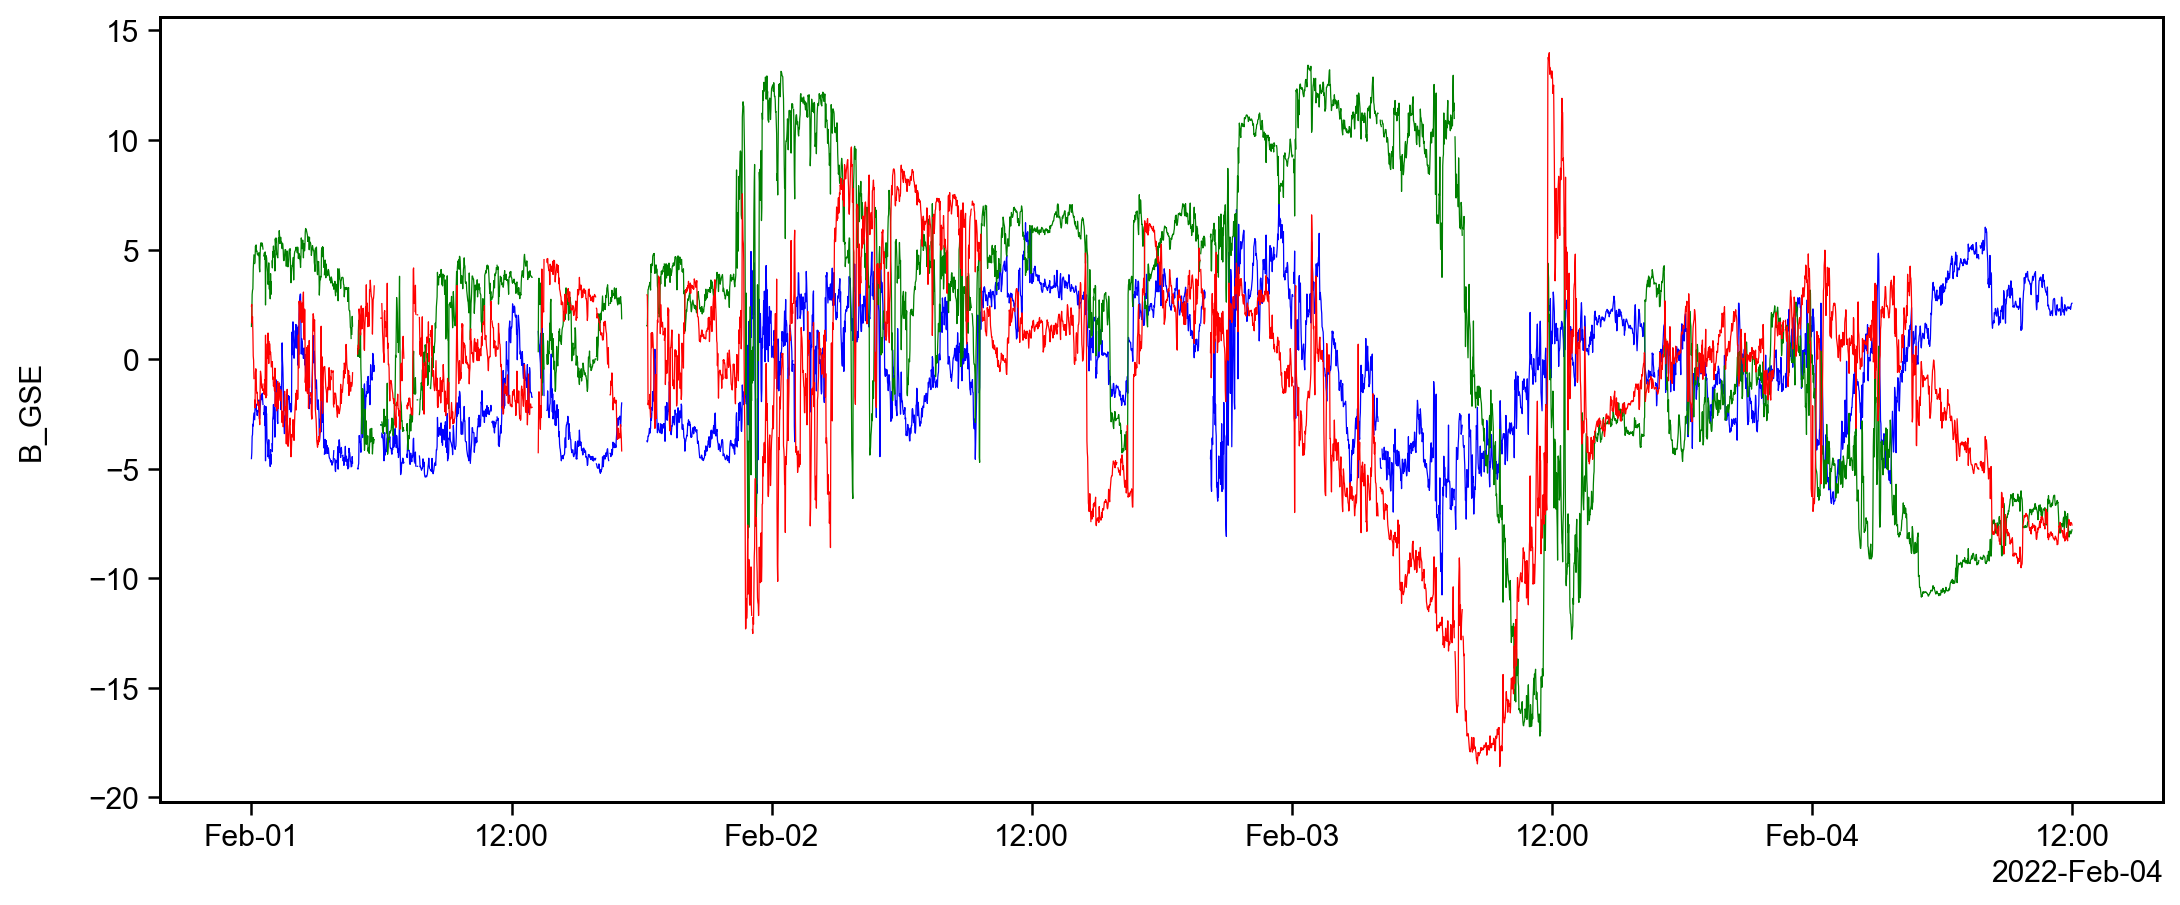

In [44]:
from pytplot import join_vec

join_vec(['BX_GSE', 'BY_GSE', 'BZ_GSE'], new_tvar='B_GSE')

tplot('B_GSE')

Add the legend names and ylabel:

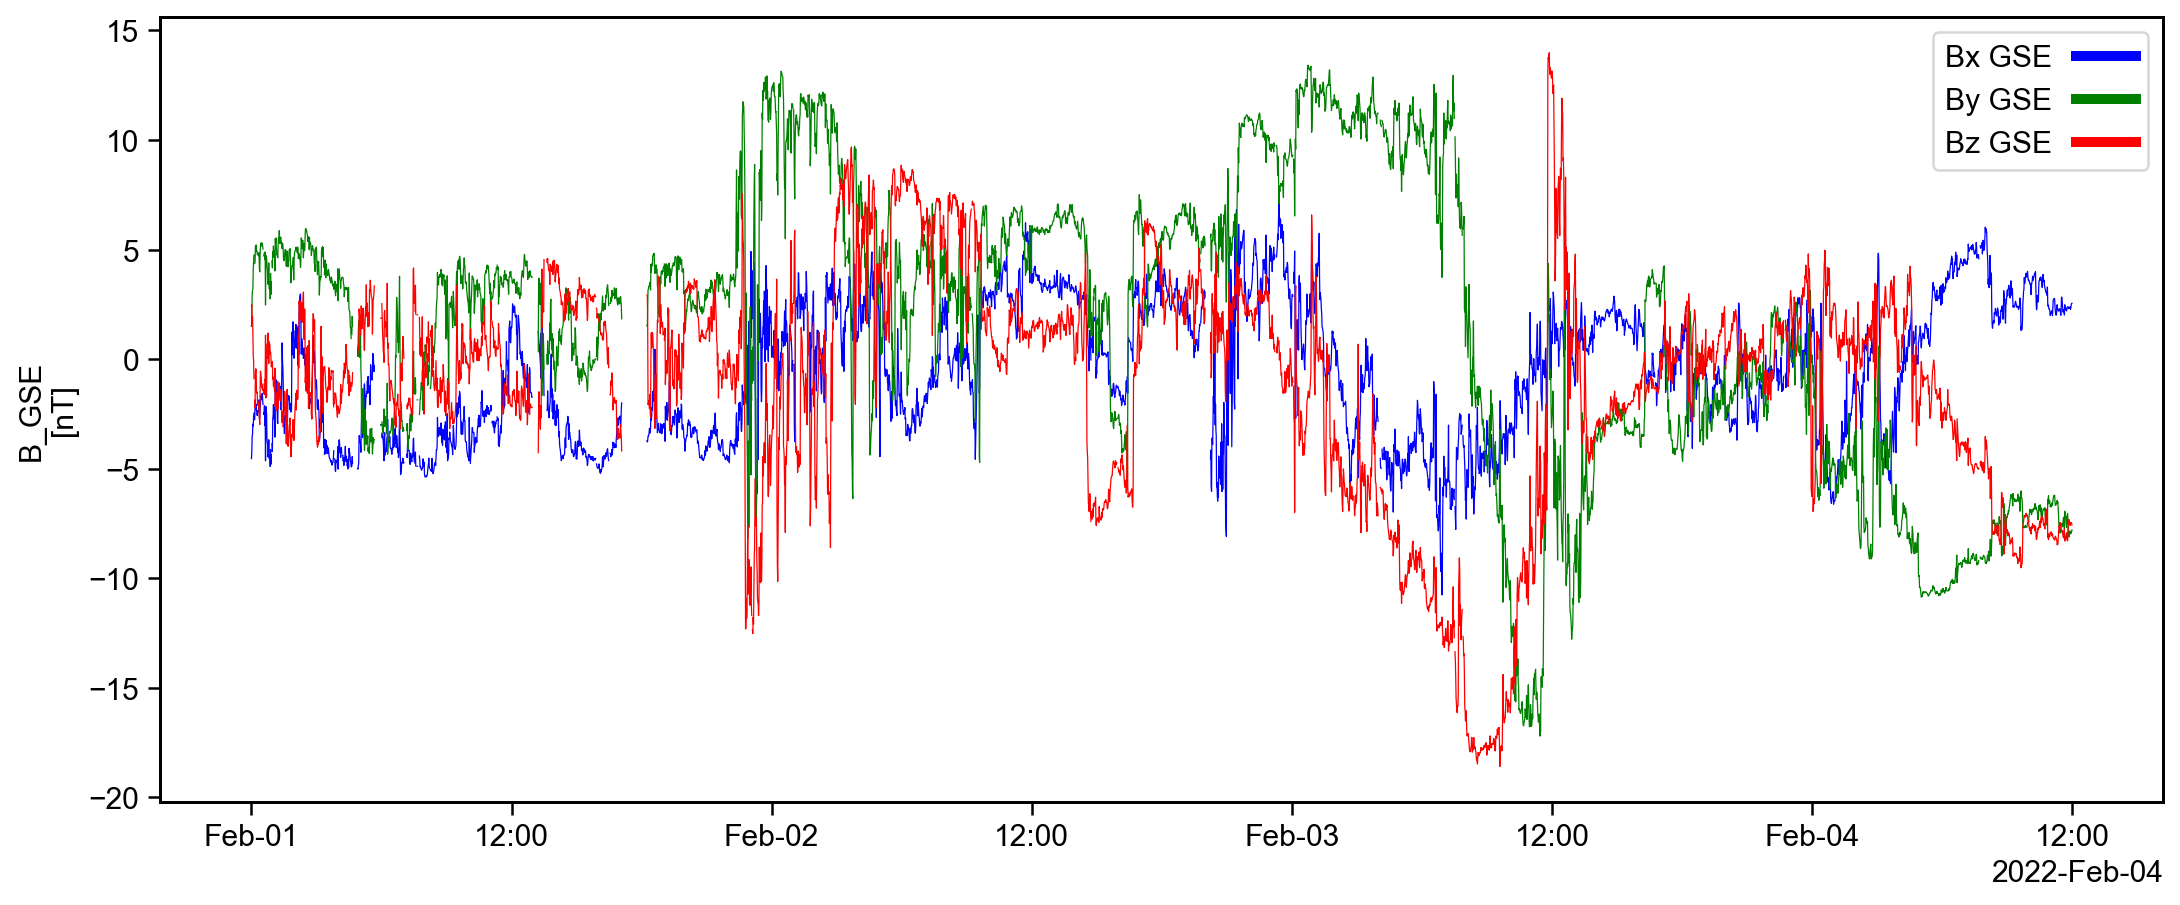

In [45]:
from pytplot import options

options('B_GSE', 'legend_names', ['Bx GSE', 'By GSE', 'Bz GSE'])

options('B_GSE', 'ysubtitle', '[nT]')

tplot('B_GSE')

You can similarly plot the plasma data!

In [46]:
join_vec(['Vx', 'Vy', 'Vz'], new_tvar='V_GSE')

24-Jul-25 20:30:58: join_vec: The new_tvar parameter is deprecated. Please use newname instead.


'V_GSE'

In [47]:
options('V_GSE', 'legend_names', ['Vx GSE', 'Vy GSE', 'Vz GSE'])

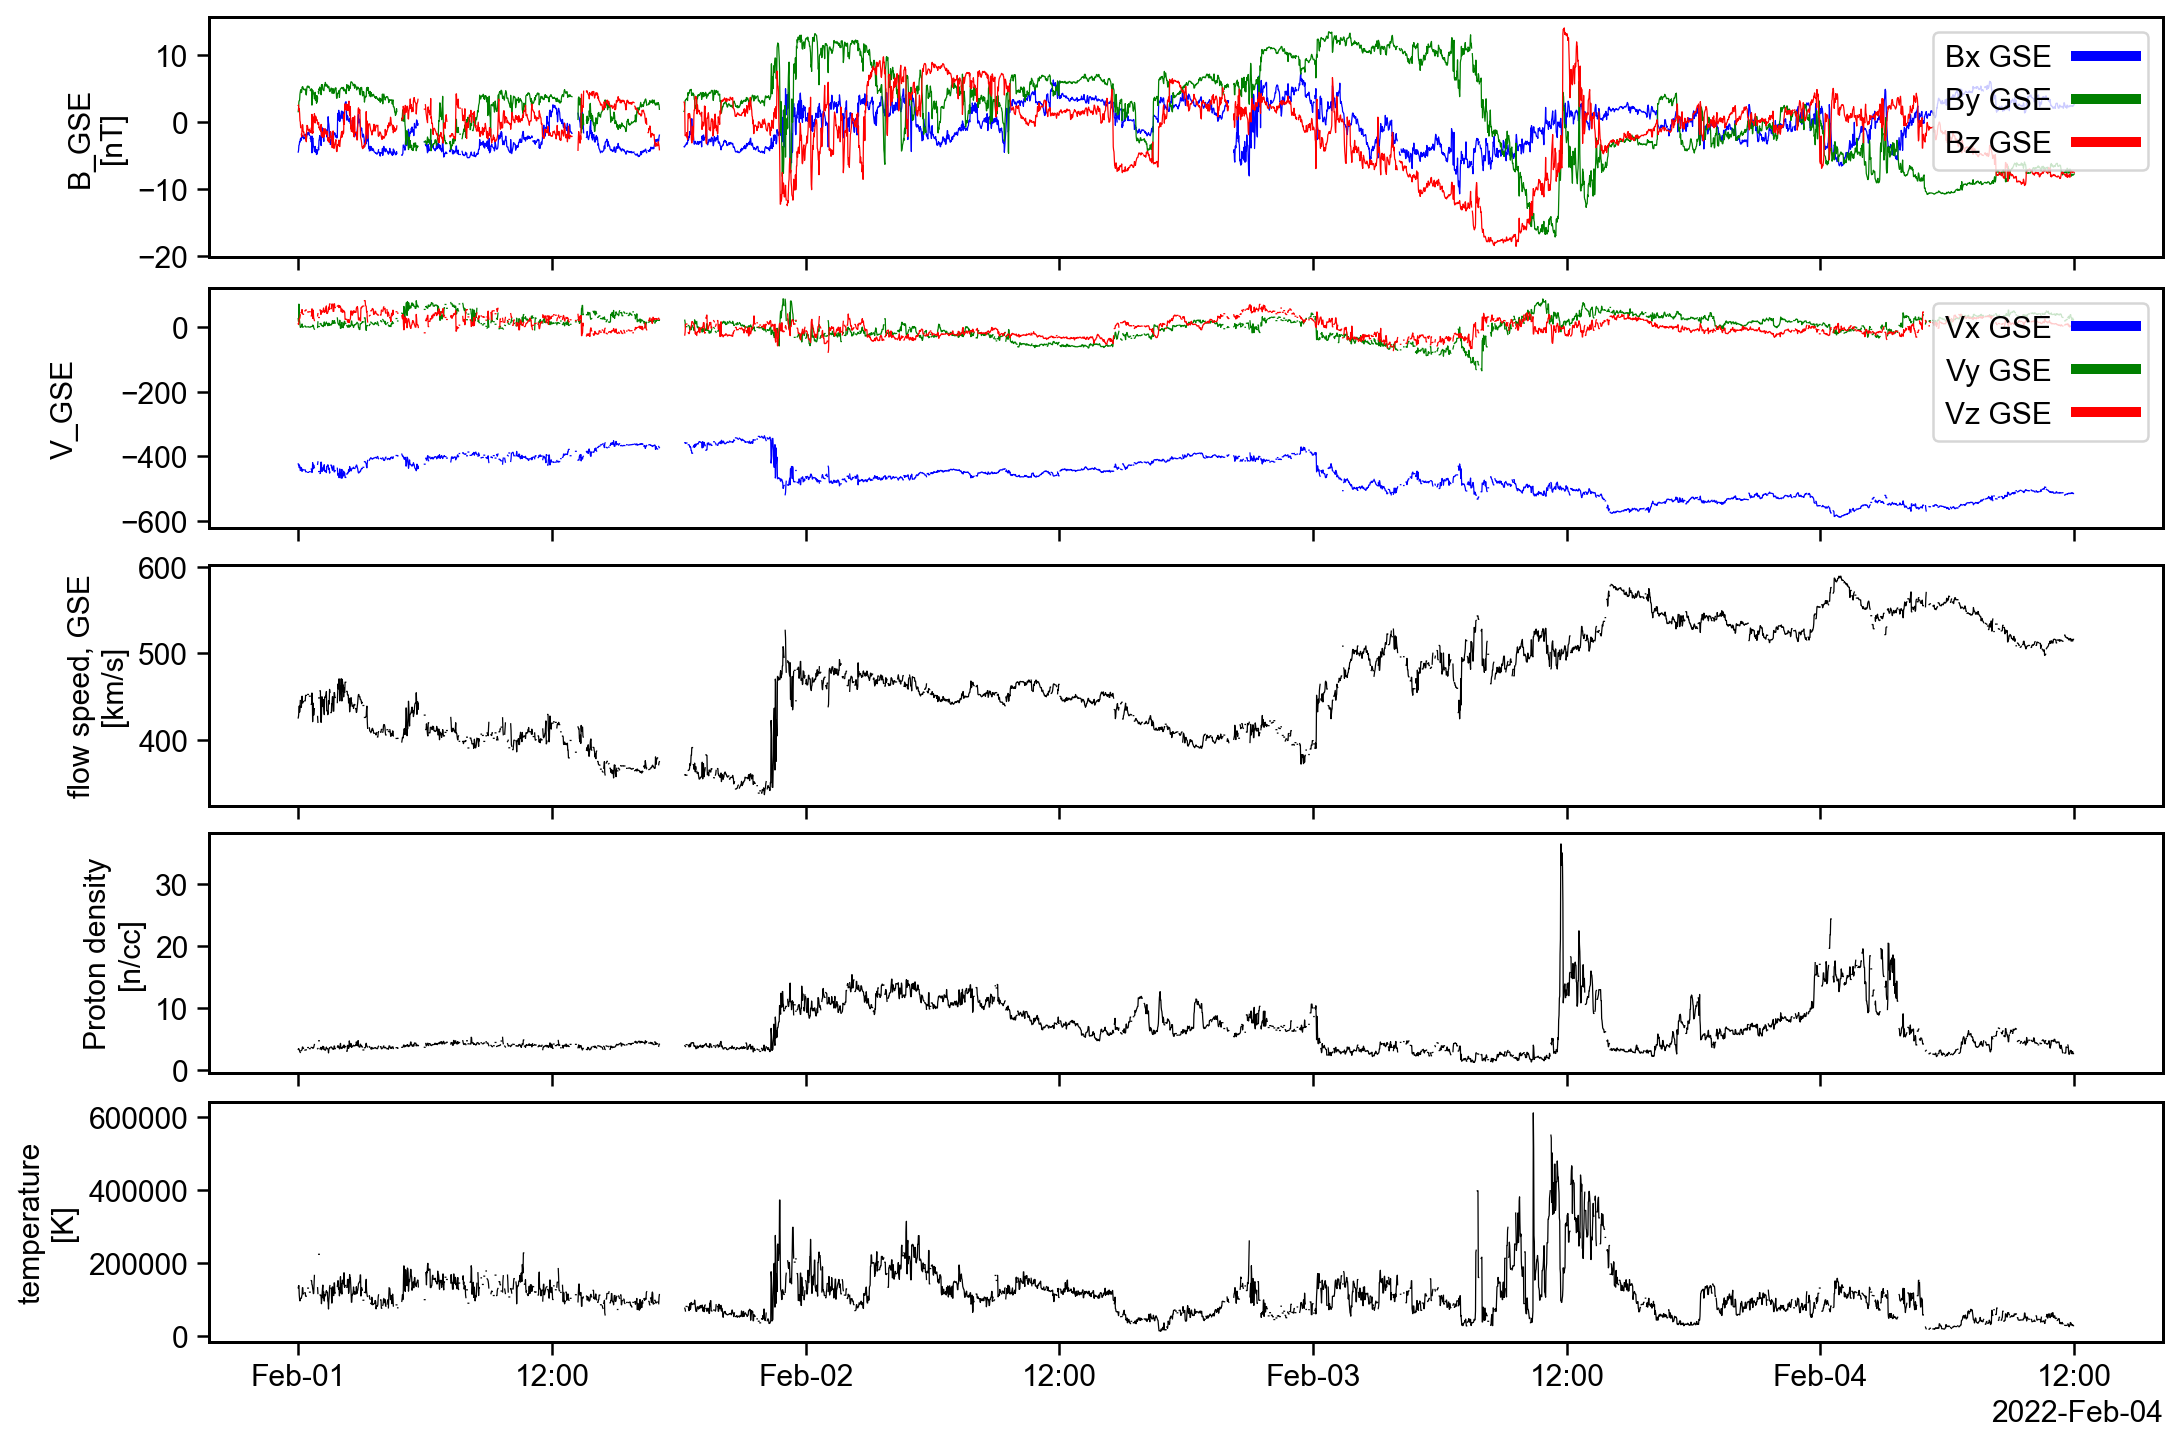

In [48]:
tplot(['B_GSE', 'V_GSE', 'flow_speed', 'proton_density', 'T'])

Add more options

In [49]:
options('B_GSE', 'ysubtitle', '[nT]')
options('V_GSE', 'ysubtitle', '[km/s]')
options('proton_density', 'ylog', True)

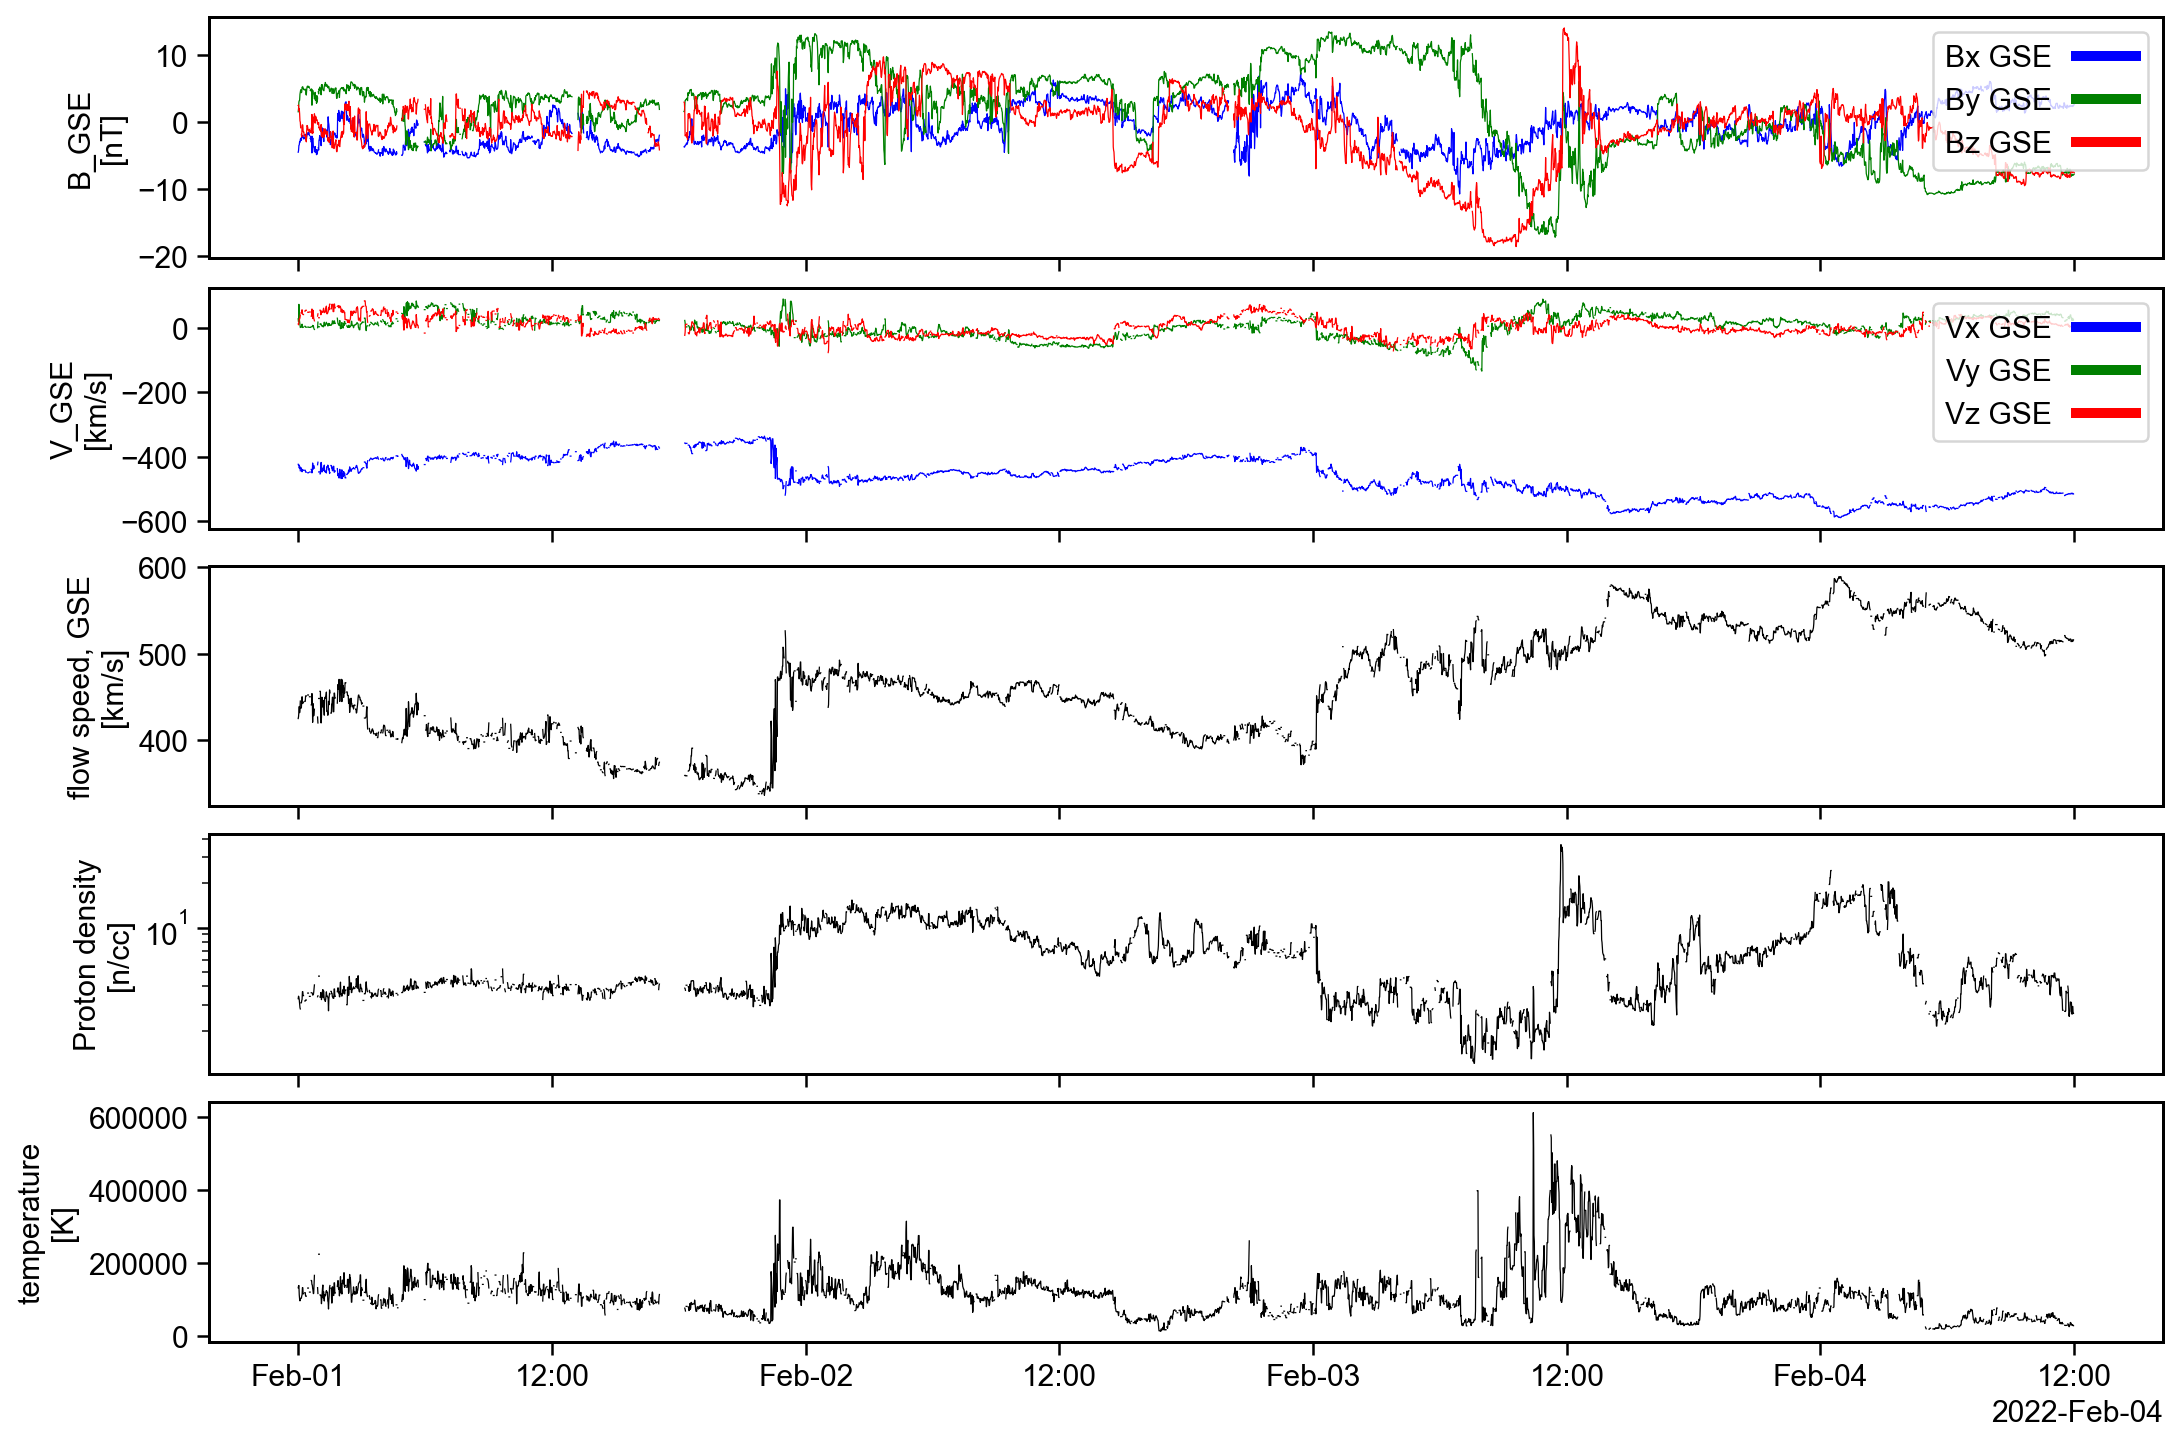

In [50]:
tplot(['B_GSE', 'V_GSE', 'flow_speed', 'proton_density', 'T'])

Return the data in `numpy` arrays

In [51]:
from pytplot import get_data

sw_v = get_data('V_GSE')

sw_v

variable(times=array([1.64367360e+09, 1.64367366e+09, 1.64367372e+09, ...,
       1.64397588e+09, 1.64397594e+09, 1.64397600e+09]), y=array([[-423.3,   27.7,   11.6],
       [-426.6,   18.1,    9.1],
       [-424.9,   72.5,   17.7],
       ...,
       [-515.4,   23.3,    5.8],
       [   nan,    nan,    nan],
       [-512.2,   25.6,    5.3]], dtype=float32))

The time values (unix times, in UTC) are in `.times`

In [52]:
sw_v.times

array([1.64367360e+09, 1.64367366e+09, 1.64367372e+09, ...,
       1.64397588e+09, 1.64397594e+09, 1.64397600e+09])

The data values are in `.y`

In [53]:
sw_v.y

array([[-423.3,   27.7,   11.6],
       [-426.6,   18.1,    9.1],
       [-424.9,   72.5,   17.7],
       ...,
       [-515.4,   23.3,    5.8],
       [   nan,    nan,    nan],
       [-512.2,   25.6,    5.3]], dtype=float32)

You can convert from unix times to strings using `time_string`

In [54]:
from pyspedas import time_string

time_string(sw_v.times[0])

'2022-02-01 00:00:00.000000'

You can also convert to datetime objects using datetime

In [55]:
import datetime

date_obj = [datetime.datetime.strptime(time_string(d), '%Y-%m-%d %H:%M:%S.%f') for d in sw_v.times]
date_obj[:5]

[datetime.datetime(2022, 2, 1, 0, 0),
 datetime.datetime(2022, 2, 1, 0, 1),
 datetime.datetime(2022, 2, 1, 0, 2),
 datetime.datetime(2022, 2, 1, 0, 3),
 datetime.datetime(2022, 2, 1, 0, 4)]

## Parker Solar Probe (PSP)

Set a timespan for four days near perihelion 2 and load magnetic field data


In [56]:
time_range = ['2019-04-03', '2019-04-03/12:00']

mag_vars = pyspedas.psp.fields(trange=time_range, datatype='mag_rtn_4_sa_per_cyc',time_clip=True)

24-Jul-25 20:31:02: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2019/
24-Jul-25 20:31:04: File is current: psp_data/fields/l2/mag_rtn_4_per_cycle/2019/psp_fld_l2_mag_rtn_4_sa_per_cyc_20190403_v02.cdf
24-Jul-25 20:31:05: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2019/
24-Jul-25 20:31:07: File is current: psp_data/fields/l2/mag_rtn_4_per_cycle/2019/psp_fld_l2_mag_rtn_4_sa_per_cyc_20190403_v02.cdf


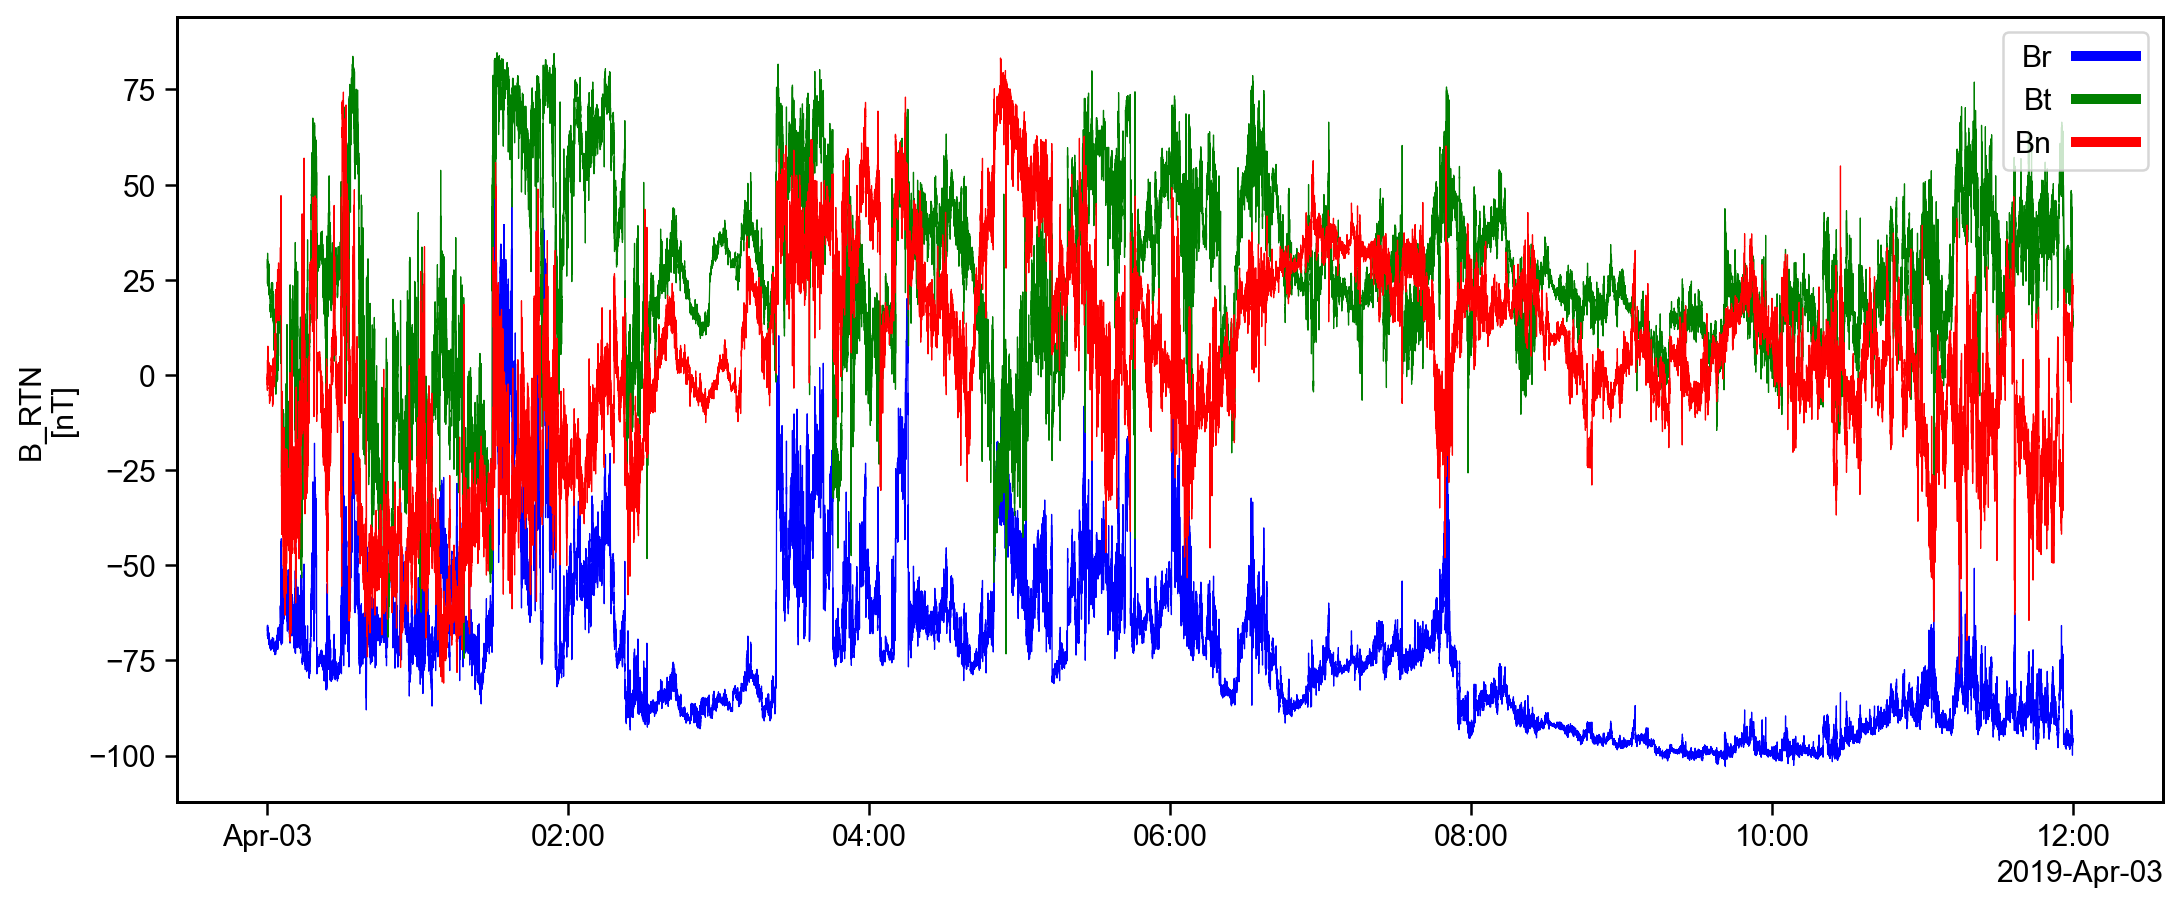

In [57]:
options('psp_fld_l2_mag_RTN_4_Sa_per_Cyc', 'legend_names', ['Br', 'Bt', 'Bn'])

tplot(['psp_fld_l2_mag_RTN_4_Sa_per_Cyc'])

You can also load Parker Solar Probe Solar Probe Cup (SPC) data, which measure the properties of solar wind plasma.

24-Jul-25 20:31:09: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spc/l3/l3i/2019/


Using LEVEL=L3


24-Jul-25 20:31:11: File is current: psp_data/sweap/spc/l3/l3i/2019/psp_swp_spc_l3i_20190403_v01.cdf
24-Jul-25 20:31:12: Floating point data values for variable na_fit are all fillval (-1.000000e+31)
24-Jul-25 20:31:12: Floating point data values for variable na_fit_uncertainty are all fillval (-1.000000e+31)
24-Jul-25 20:31:12: Floating point data values for variable wa_fit are all fillval (-1.000000e+31)
24-Jul-25 20:31:12: Floating point data values for variable wa_fit_uncertainty are all fillval (-1.000000e+31)
24-Jul-25 20:31:12: Floating point data values for variable va_fit_SC are all fillval (-1.000000e+31)
24-Jul-25 20:31:12: Floating point data values for variable va_fit_SC_uncertainty are all fillval (-1.000000e+31)
24-Jul-25 20:31:12: Floating point data values for variable va_fit_RTN are all fillval (-1.000000e+31)
24-Jul-25 20:31:12: Floating point data values for variable va_fit_RTN_uncertainty are all fillval (-1.000000e+31)


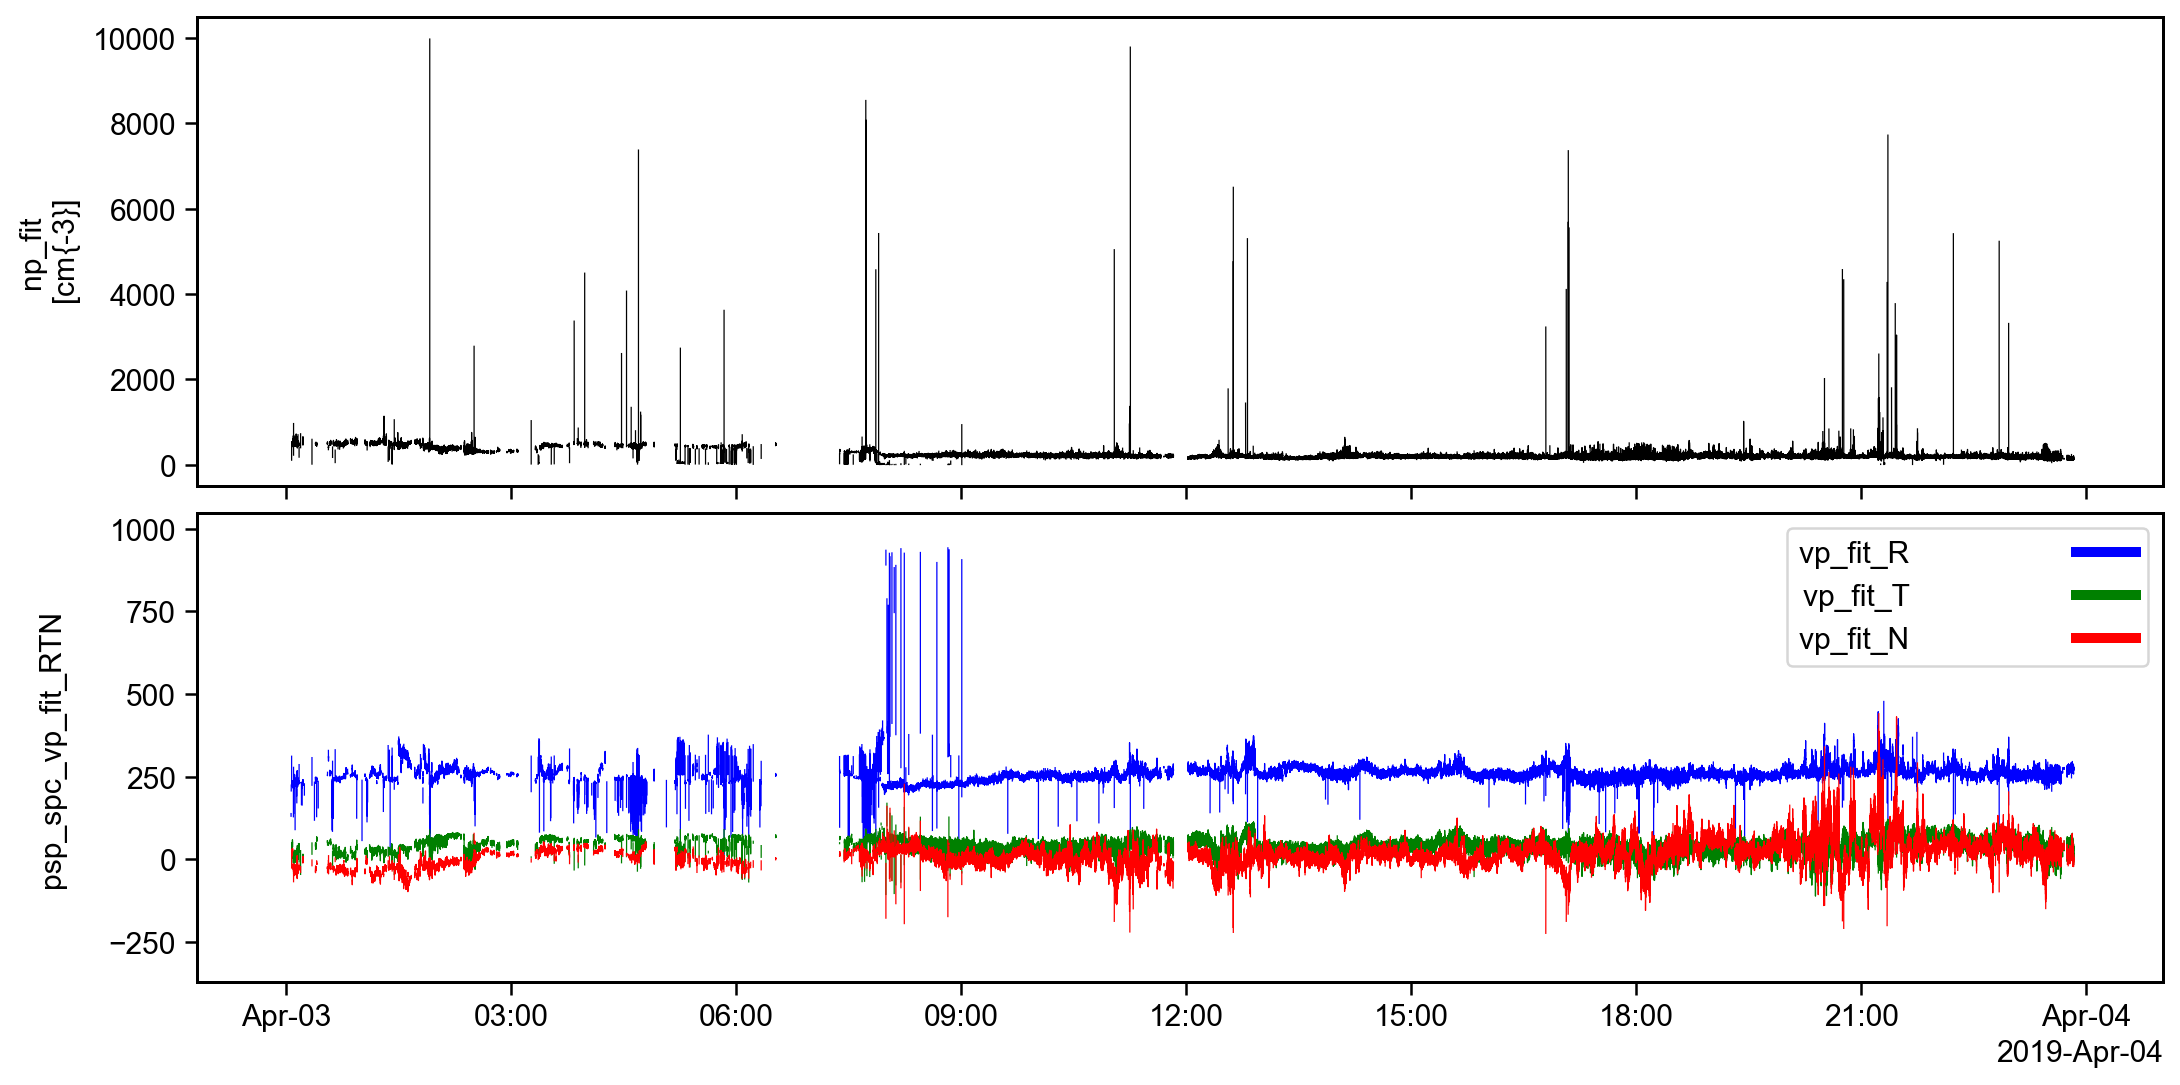

In [58]:
spc_vars = pyspedas.projects.psp.spc(trange=time_range, datatype='l3i', level='l3')

tplot(['psp_spc_np_fit', 'psp_spc_vp_fit_RTN'])

In [59]:
help(tplot)

Help on function tplot in module pytplot.tplot:

tplot(
    name,
    trange=None,
    var_label=None,
    slice=False,
    combine_axes=True,
    nb=False,
    save_file=None,
    gui=False,
    qt=False,
    bokeh=False,
    save_png=None,
    display=True,
    testing=False,
    extra_functions=[],
    extra_function_args=[],
    vert_spacing=None,
    pos_2d=False,
    pos_3d=False,
    exec_qt=True,
    window_name='Plot',
    interactive=False,
    xsize=None,
    ysize=None,
    save_eps='',
    save_svg='',
    save_pdf='',
    save_jpeg='',
    dpi=None,
    fig=None,
    axis=None,
    pseudo_plot_num=None,
    second_axis_size=0.0,
    return_plot_objects=False
)
    This is the function used to display the tplot variables stored in memory.  It is a wrapper that
    calls a matplotlib-specific version of tplot.

    Parameters
    ----------
        name : str or list of str, required
            List of tplot variables that will be plotted.
            If this is empty, not

### Familiar with Pandas? Create Dataframe!

In [60]:
import pandas as pd

In [61]:
time_range = ['2019-04-03', '2019-04-03/12:00']

mag_vars = pyspedas.psp.fields(trange=time_range, datatype='mag_rtn_4_sa_per_cyc',time_clip=True)

print(mag_vars)

# get the RTN magnetic field
B_RTN = get_data('psp_fld_l2_mag_RTN_4_Sa_per_Cyc')


# Convert time from Julian Time to Datetime object
date_obj = [datetime.datetime.strptime(time_string(d), '%Y-%m-%d %H:%M:%S.%f') for d in B_RTN.times]


# Create Dataframe
rd = {'Time': date_obj, 'Br': B_RTN.y[:, 0], 'Bt': B_RTN.y[:, 1], 'Bn': B_RTN.y[:, 2]}
fields = pd.DataFrame(data=rd)

# Save dataframe as csv
#fields.to_csv(os.path.join('results', 'fields.csv')) 

24-Jul-25 20:31:14: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2019/
24-Jul-25 20:31:17: File is current: psp_data/fields/l2/mag_rtn_4_per_cycle/2019/psp_fld_l2_mag_rtn_4_sa_per_cyc_20190403_v02.cdf
24-Jul-25 20:31:17: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2019/
24-Jul-25 20:31:19: File is current: psp_data/fields/l2/mag_rtn_4_per_cycle/2019/psp_fld_l2_mag_rtn_4_sa_per_cyc_20190403_v02.cdf


['psp_fld_l2_mag_RTN_4_Sa_per_Cyc', 'psp_fld_l2_quality_flags']


In [62]:
fields.head()

Time         Br         Bt        Bn
0 2019-04-03 00:00:00.075775 -68.480568  24.101665 -2.508148
1 2019-04-03 00:00:00.294229 -68.432144  24.598341 -1.988275
2 2019-04-03 00:00:00.512682 -68.278091  25.493971 -1.862708
3 2019-04-03 00:00:00.731135 -68.241798  26.324995 -2.078608
4 2019-04-03 00:00:00.949589 -67.988182  27.224974 -3.113755

## Matplotlib

You can then create your own plots of the data using matplotlib. With this, you can also control the default styles and behaviors of plots globally across your session.

In [63]:
#Matplotlib style configuration

import matplotlib as mpl

mpl.rcParams['font.family'      ]='Arial'#'Gill Sans'
mpl.rcParams['mathtext.default' ]='regular'
mpl.rcParams['font.size'        ]=12
mpl.rcParams['figure.figsize'   ]=(6,4)
mpl.rcParams['figure.dpi'       ]=180
mpl.rcParams['axes.linewidth'   ]=1.2
mpl.rcParams['xtick.major.size' ]=5
mpl.rcParams['xtick.minor.size' ]=4
mpl.rcParams['ytick.major.size' ]=5
mpl.rcParams['ytick.minor.size' ]=3
mpl.rcParams['xtick.major.width']=1
mpl.rcParams['ytick.major.width']=1
mpl.rcParams['xtick.direction'  ]='out'
mpl.rcParams['ytick.direction'  ]='out'

mpl.rcParams['savefig.bbox'     ]='tight'

mpl.rcParams['animation.html'   ]='jshtml'

(-120.0, 120.0)

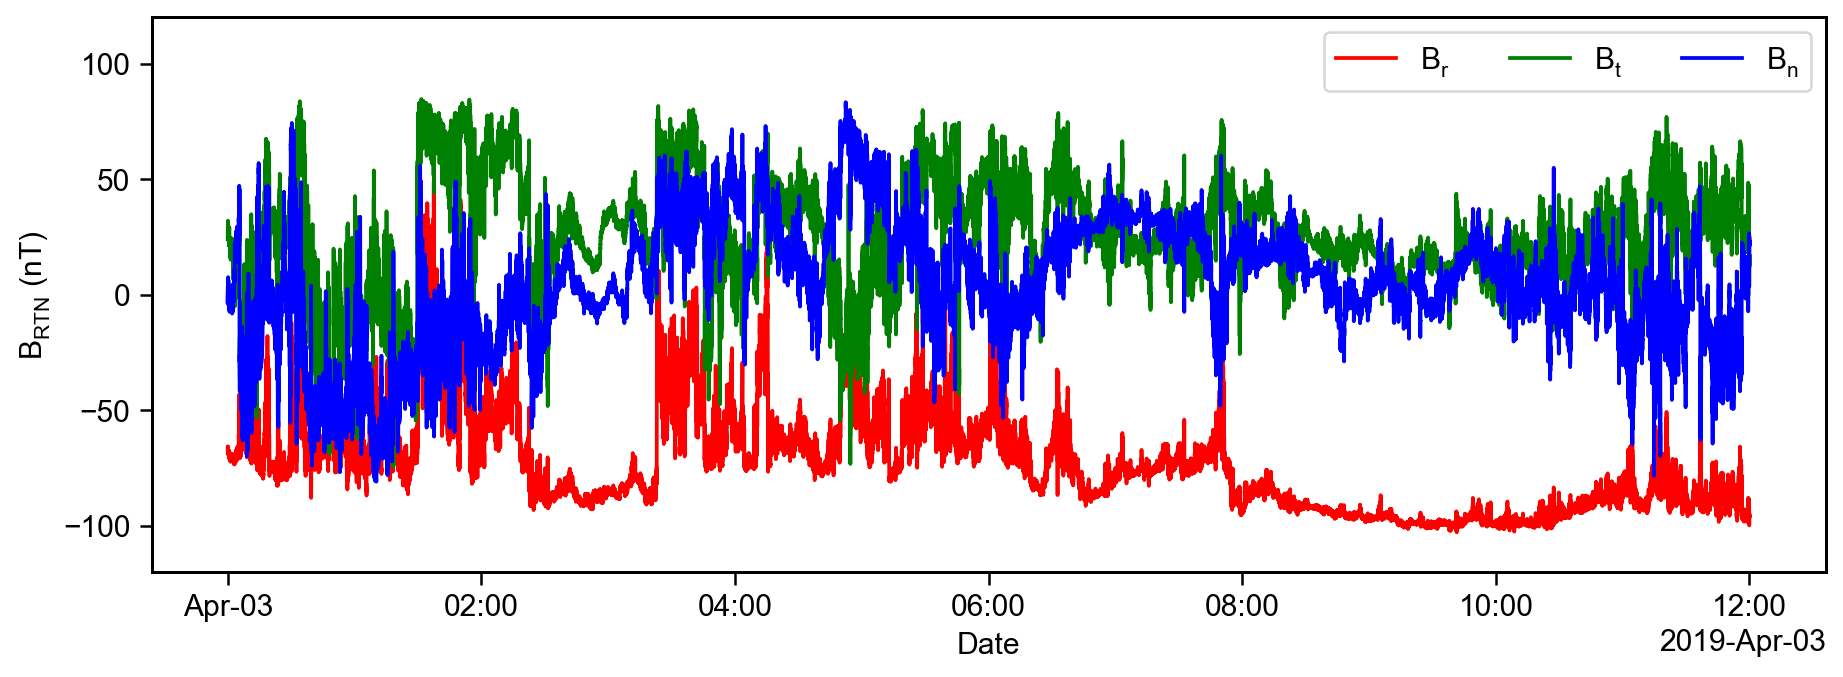

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(fields.Time, fields.Br, color="red", label=r"B$_r$")
plt.plot(fields.Time, fields.Bt, color="green",label=r"B$_t$")
plt.plot(fields.Time, fields.Bn, color="blue",label=r"B$_n$")

plt.legend(ncols=3)
plt.ylabel(r"B$_{RTN}$ (nT)")
plt.xlabel(r"Date")
plt.ylim([-120, 120])

### Some Key Plasma Parameters

#### 1. **Alfvén Speed** ($V_A$)  
Speed at which Alfvén waves propagate along magnetic field lines.

$$
V_A = \frac{B}{\sqrt{\mu_0 \, n \, m_p}}
$$

---

#### 2. **Alfvén Mach Number** ($M_A$)  
Ratio of solar wind speed to Alfvén speed.

$$
M_A = \frac{V}{V_A}
$$

---

#### 3. **Magnetic Pressure** ($P_B$)  
Pressure exerted by the magnetic field.

$$
P_B = \frac{B^2}{2 \mu_0}
$$

---

#### 4. **Thermal Pressure** ($P_{th}$)  
Pressure due to thermal motion of particles.

$$
P_{th} = n \, k \, T
$$

---

#### 5. **Plasma Beta** ($\beta$)  
Ratio of thermal pressure to magnetic pressure.

$$
\beta = \frac{P_{th}}{P_B}
$$


## OMNI

In [65]:
time_range = ['2019-01-03', '2019-01-04']


sw_vars = pyspedas.projects.omni.data(trange=time_range,datatype='1min',time_clip=True);
B_GSE = get_data('BX_GSE')
date_obj = [datetime.datetime.strptime(time_string(d), '%Y-%m-%d %H:%M:%S.%f') for d in B_GSE.times]



rd = {'Time': date_obj, 'Bx': get_data('BX_GSE').y, 'By': get_data('BY_GSE').y, 'Bz':get_data('BZ_GSE').y,
     'Vx':  get_data('Vx').y,
      'Vy':   get_data('Vy').y, 
      'Vz':   get_data('Vz').y,  
      'np':   get_data('proton_density').y, 
      'Tp':  get_data('T').y}
df = pd.DataFrame(data=rd)

df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)



df.head()

24-Jul-25 20:31:26: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro_1min/2019/
24-Jul-25 20:31:28: File is current: omni_data/hro_1min/2019/omni_hro_1min_20190101_v01.cdf


Bx    By    Bz          Vx   Vy    Vz   np       Tp
Time                                                                      
2019-01-03 00:00:00 -0.18  1.48 -1.34         NaN  NaN   NaN  NaN      NaN
2019-01-03 00:01:00 -0.68  1.38 -1.12         NaN  NaN   NaN  NaN      NaN
2019-01-03 00:02:00 -0.68  1.38 -1.12         NaN  NaN   NaN  NaN      NaN
2019-01-03 00:03:00 -0.20  1.44 -1.35         NaN  NaN   NaN  NaN      NaN
2019-01-03 00:04:00 -0.71  1.40 -1.00 -330.200012 -5.6  10.0  4.8  31045.0

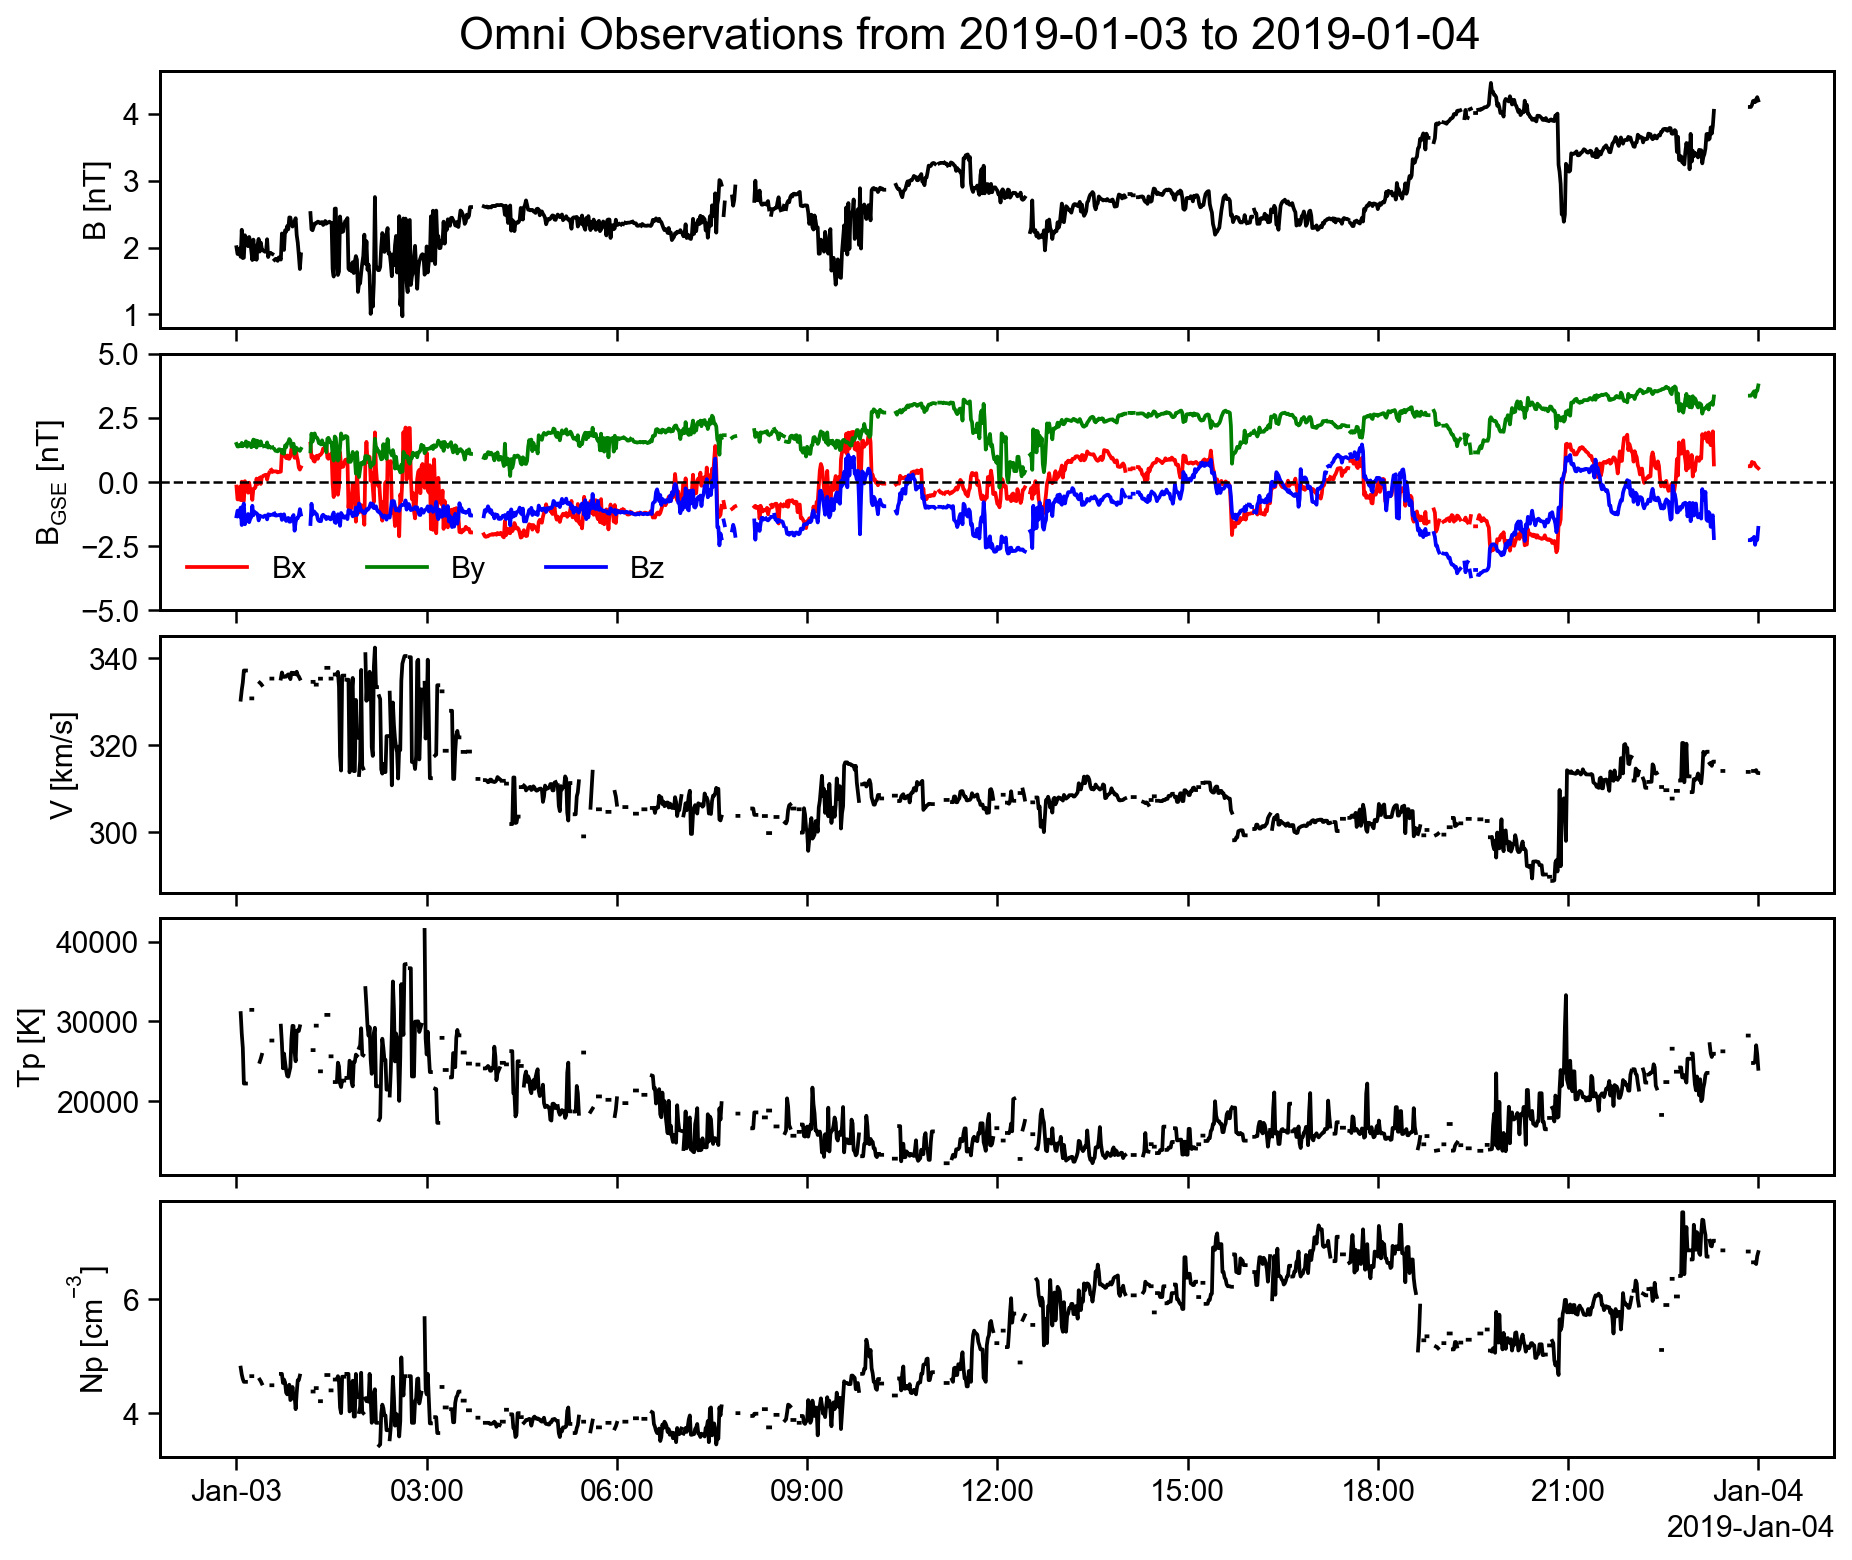

In [66]:
import numpy as np


df['B'] = np.sqrt(df['Bx']**2 + df['By']**2 + df['Bz']**2)
df['V'] = np.sqrt(df['Vx']**2 + df['Vy']**2 + df['Vz']**2)


fig, axs = plt.subplots(5, 1, figsize=(12, 10), sharex=True, gridspec_kw={"hspace":0.1})

axs[0].plot(df.index, df['B'], color="black")
axs[0].set_ylabel('B [nT]')

axs[1].plot(df.index, df['Bx'], label='Bx', color="red")
axs[1].plot(df.index, df['By'], label='By', color="green")
axs[1].plot(df.index, df['Bz'], label='Bz', color="blue")
axs[1].set_ylabel(r'B$_{GSE}$ [nT]')
axs[1].legend(ncols=3, fontsize=12, loc="lower left", frameon=False)
axs[1].set_ylim([-5, 5])
axs[1].axhline(0, linestyle="--", color="black", lw=1)

axs[2].plot(df.index, df['V'], color='black')
axs[2].set_ylabel('V [km/s]')

axs[3].plot(df.index, df['Tp'], color='black')
axs[3].set_ylabel('Tp [K]')

axs[4].plot(df.index, df['np'], color='black')
axs[4].set_ylabel(r'Np [cm$^{-3}$]')

fig.suptitle("Omni Observations from 2019-01-03 to 2019-01-04", fontsize=18, color="black",x=0.5, y=0.91)

plt.show()


### Calculation of key plasma parameters!

In [67]:
from scipy.constants import mu_0, k, m_p

# Convert units to SI
B_T = df['B'] * 1e-9          # nT → T
n_m3 = df['np'] * 1e6         # cm⁻³ → m⁻³
T_p  = df['Tp']               # already in K
V_ms = df['V'] * 1e3          # km/s → m/s


# Magnetic pressure
df['P_B'] = 1e9 * B_T**2 / (2 * mu_0)  # in nPa

# Thermal pressure (proton)
df['P_th'] = 1e9 * n_m3 * k * T_p      # in Pa

# Plasma beta
df['beta'] = df['P_th'] / df['P_B']

# Alfvén speed
df['Va'] = B_T / np.sqrt(mu_0 * n_m3 * m_p)  # m/s

# Alfvén Mach number
df['M_A'] = V_ms / df['Va']


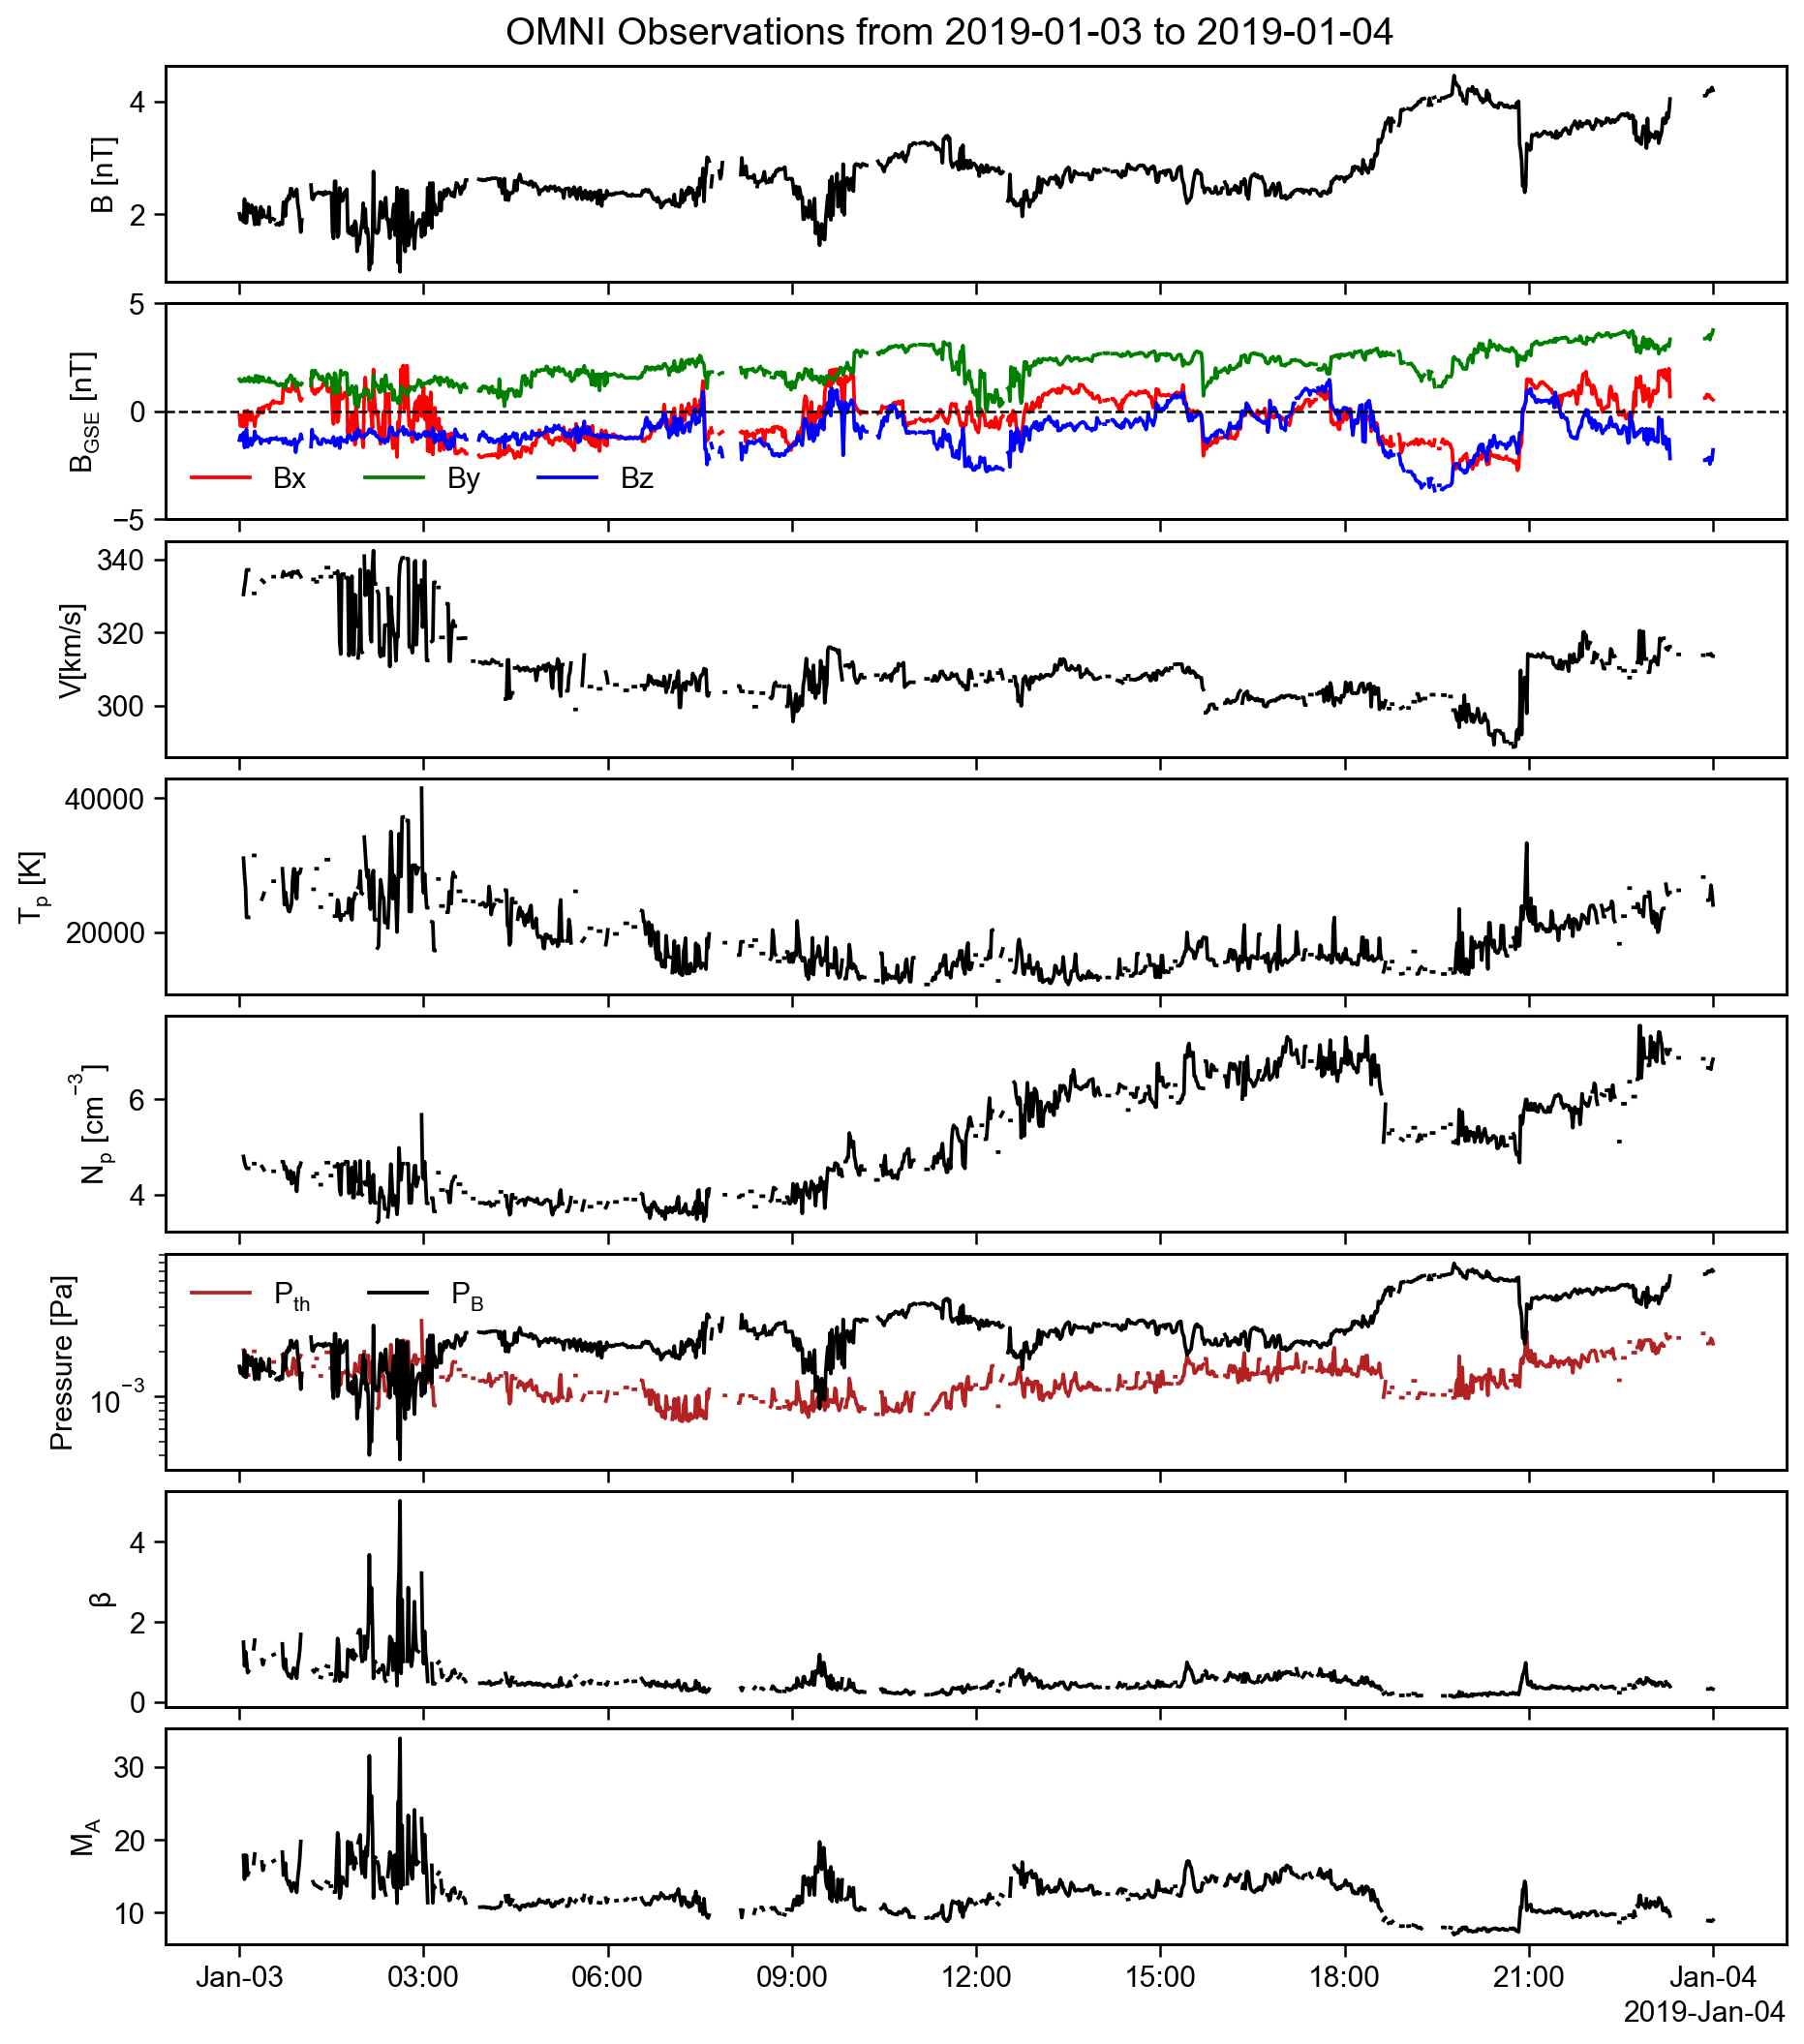

In [68]:
fig, axs = plt.subplots(8, 1, figsize=(12, 14), sharex=True, gridspec_kw={"hspace":0.1})

axs[0].plot(df.index, df['B'], color="black")
axs[0].set_ylabel('B [nT]')


axs[1].plot(df.index, df['Bx'], label='Bx', color="red")
axs[1].plot(df.index, df['By'], label='By', color="green")
axs[1].plot(df.index, df['Bz'], label='Bz', color="blue")
axs[1].set_ylabel(r'B$_{GSE}$ [nT]')
axs[1].legend(ncols=3, fontsize=12, loc="lower left", frameon=False)
axs[1].set_ylim([-5, 5])
axs[1].axhline(0, linestyle="--", color="black", lw=1)


axs[2].plot(df.index, df['V'], color='black')
axs[2].set_ylabel('V[km/s]')

axs[3].plot(df.index, df['Tp'], color='black')
axs[3].set_ylabel('T$_p$ [K]')


axs[4].plot(df.index, df['np'], color='black')
axs[4].set_ylabel(r'N$_p$ [cm$^{-3}$]')


axs[5].plot(df.index, df['P_th'], label='P$_{th}$', color='firebrick')
axs[5].plot(df.index, df['P_B'], label='P$_B$', color='black')
axs[5].set_ylabel('Pressure [Pa]')
axs[5].legend(loc="upper left", frameon=False, ncols=2)
axs[5].set_yscale("log")


axs[6].plot(df.index, df['beta'], color='black')
#axs[6].plot(df.index, df['beta_approx'], color='black')
axs[6].set_ylabel(r'$\beta$')


axs[7].plot(df.index, df['M_A'], color='black')
axs[7].set_ylabel(r'$M_A$')

fig.suptitle("OMNI Observations from 2019-01-03 to 2019-01-04", fontsize=16, color="black", x=0.5, y=0.90)

plt.show()

Those are characteristics typical of the slow solar wind!

### Typical Parameters of Slow and Fast Solar Wind

#### Wind Parameters

| **Wind Parameter**            | **Slow Wind**           | **Fast Wind**           |
|------------------------------|-------------------------|-------------------------|
| Number density               | 15 cm⁻³                 | 4 cm⁻³                  |
| Bulk velocity                | 350 km/s                | 600 km/s                |
| Proton temperature           | $5 \times 10^4$ K        | $2 \times 10^5$ K        |
| Electron temperature         | $2 \times 10^5$ K        | $1 \times 10^5$ K        |
| Magnetic field               | 6 nT                    | 6 nT                    |

---

#### Characteristic Speeds

| **Speed**                    | **Slow Wind**     | **Fast Wind**     |
|-----------------------------|-------------------|-------------------|
| Alfvén                      | 30 km/s           | 60 km/s           |
| Ion sound                   | 60 km/s           | 60 km/s           |
| Proton thermal              | 35 km/s           | 70 km/s           |
| Electron thermal            | 3000 km/s         | 2000 km/s         |


### Fast Wind

In [69]:
time_range = ['2018-11-02', '2018-11-06 12:00']


sw_vars = pyspedas.projects.omni.data(trange=time_range,datatype='1min',time_clip=True);
B_GSE = get_data('BX_GSE')
date_obj = [datetime.datetime.strptime(time_string(d), '%Y-%m-%d %H:%M:%S.%f') for d in B_GSE.times]



rd = {'Time': date_obj, 'Bx': get_data('BX_GSE').y, 'By': get_data('BY_GSE').y, 'Bz':get_data('BZ_GSE').y,
     'Vx':  get_data('Vx').y,
      'Vy':   get_data('Vy').y, 
      'Vz':   get_data('Vz').y,  
      'np':   get_data('proton_density').y, 
      'Tp':  get_data('T').y}
df = pd.DataFrame(data=rd)

df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)



df.head()

24-Jul-25 20:31:34: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro_1min/2018/
24-Jul-25 20:31:36: File is current: omni_data/hro_1min/2018/omni_hro_1min_20181101_v01.cdf


Bx    By    Bz          Vx    Vy   Vz    np       Tp
Time                                                                       
2018-11-02 00:00:00 -2.18  2.81 -0.39 -334.500000  13.5 -2.0  9.77  40804.0
2018-11-02 00:01:00 -2.49  2.63 -0.06 -336.299988  14.6  1.2  9.14  47639.0
2018-11-02 00:02:00 -1.79  3.01 -1.11 -336.700012  14.7  1.8  9.04  48595.0
2018-11-02 00:03:00 -1.82  2.91 -1.32 -337.700012  16.9  2.4  9.73  40971.0
2018-11-02 00:04:00 -2.39  2.69 -1.16 -336.200012  15.7  1.7  9.43  42805.0

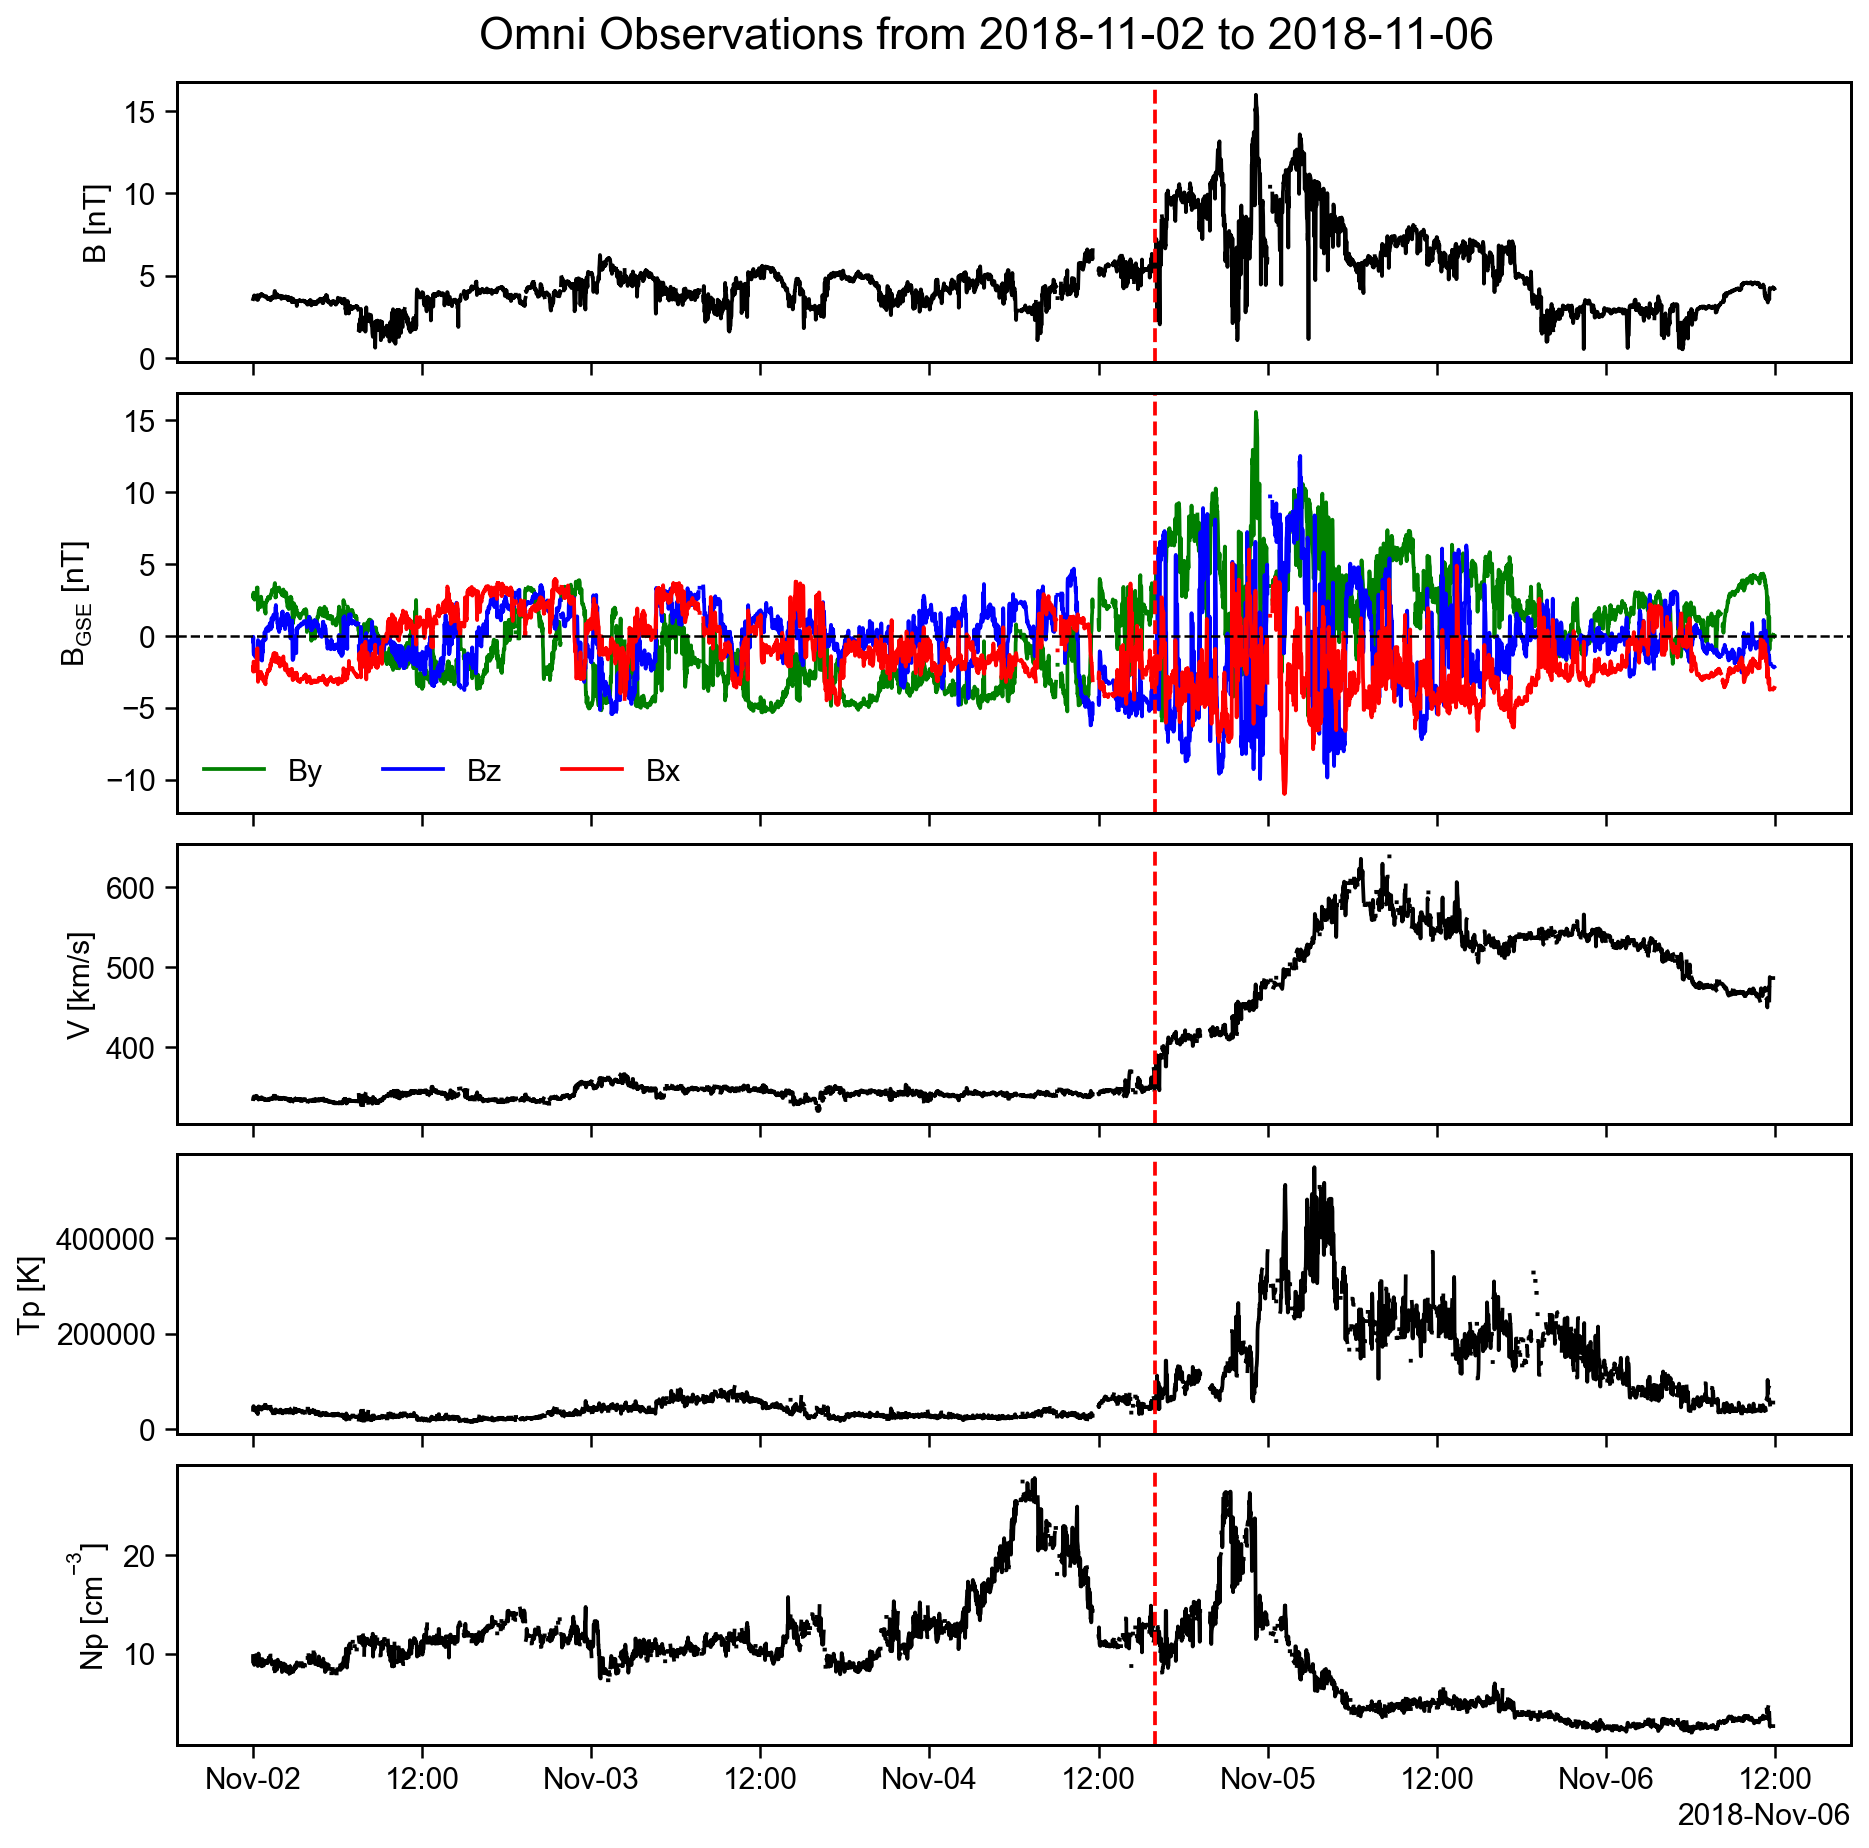

In [70]:
import numpy as np


df['B'] = np.sqrt(df['Bx']**2 + df['By']**2 + df['Bz']**2)
df['V'] = np.sqrt(df['Vx']**2 + df['Vy']**2 + df['Vz']**2)


fig, axs = plt.subplots(5, 1, figsize=(12, 12), sharex=True, gridspec_kw={"hspace":0.1,
                                                                          "height_ratios": [1, 1.5, 1, 1, 1]})

axs[0].plot(df.index, df['B'], color="black")
axs[0].set_ylabel('B [nT]')


axs[1].plot(df.index, df['By'], label='By', color="green")
axs[1].plot(df.index, df['Bz'], label='Bz', color="blue")
axs[1].plot(df.index, df['Bx'], label='Bx', color="red")
axs[1].set_ylabel(r'B$_{GSE}$ [nT]')
axs[1].legend(ncols=3, fontsize=12, loc="lower left", frameon=False)
#axs[1].set_ylim([-5, 5])
axs[1].axhline(0, linestyle="--", color="black", lw=1)

axs[2].plot(df.index, df['V'], color='black')
axs[2].set_ylabel('V [km/s]')

axs[3].plot(df.index, df['Tp'], color='black')
axs[3].set_ylabel('Tp [K]')

axs[4].plot(df.index, df['np'], color='black')
axs[4].set_ylabel(r'Np [cm$^{-3}$]')

fig.suptitle("Omni Observations from 2018-11-02 to 2018-11-06", fontsize=18, color="black",x=0.5, y=0.91)

for ax in axs.flatten():
    ax.axvline(pd.Timestamp('2018-11-04 16:00'), color="red", linestyle="--")

plt.show()

Check the coronal hole in **AIA 193 Å** wavelength observed on **2018 November 1**.

https://www.spaceweather.live/en/archive/2018/11/01/coronal-holes.html

### Interplanetary Magnetic Clouds

The Solar Cause of the 2022 February 3 Geomagnetic Storm that Led to the Demise of the Starlink Satellites

Read more at https://arxiv.org/abs/2303.02330

Adding one extra parameter, SYM-H, which is a measure of the disturbance in the Earth's magnetic field caused by solar activity, such as solar flares and coronal mass ejections (CMEs). It is an index that quantifies the severity of geomagnetic storms.

In [71]:
time_range = ['2022-02-01', '2022-02-04 12:00']


sw_vars = pyspedas.projects.omni.data(trange=time_range,datatype='1min',time_clip=True);
B_GSE = get_data('BX_GSE')
date_obj = [datetime.datetime.strptime(time_string(d), '%Y-%m-%d %H:%M:%S.%f') for d in B_GSE.times]



rd = {'Time': date_obj, 'Bx': get_data('BX_GSE').y, 'By': get_data('BY_GSE').y, 'Bz':get_data('BZ_GSE').y,
     'Vx':  get_data('Vx').y,
      'Vy':   get_data('Vy').y, 
      'Vz':   get_data('Vz').y,  
      'np':   get_data('proton_density').y, 
      'Tp':  get_data('T').y,
    'sym-h': get_data('SYM_H').y}
df = pd.DataFrame(data=rd)

df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)



df.head()

24-Jul-25 20:31:41: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro_1min/2022/
24-Jul-25 20:31:43: File is current: omni_data/hro_1min/2022/omni_hro_1min_20220201_v01.cdf


Bx    By    Bz          Vx         Vy         Vz    np  \
Time                                                                            
2022-02-01 00:00:00 -4.54  1.49  2.42 -423.299988  27.700001  11.600000  3.31   
2022-02-01 00:01:00 -4.28  1.97  2.49 -426.600006  18.100000   9.100000  3.44   
2022-02-01 00:02:00 -3.52  2.95  1.64 -424.899994  72.500000  17.700001  3.37   
2022-02-01 00:03:00 -3.45  3.14  1.94 -434.899994  27.100000  27.400000  3.25   
2022-02-01 00:04:00 -2.97  3.20  1.24 -429.299988  17.500000  26.400000  3.08   

                           Tp  sym-h  
Time                                  
2022-02-01 00:00:00  132240.0     -8  
2022-02-01 00:01:00  136818.0     -9  
2022-02-01 00:02:00  138420.0     -9  
2022-02-01 00:03:00  112788.0     -9  
2022-02-01 00:04:00  101207.0     -9

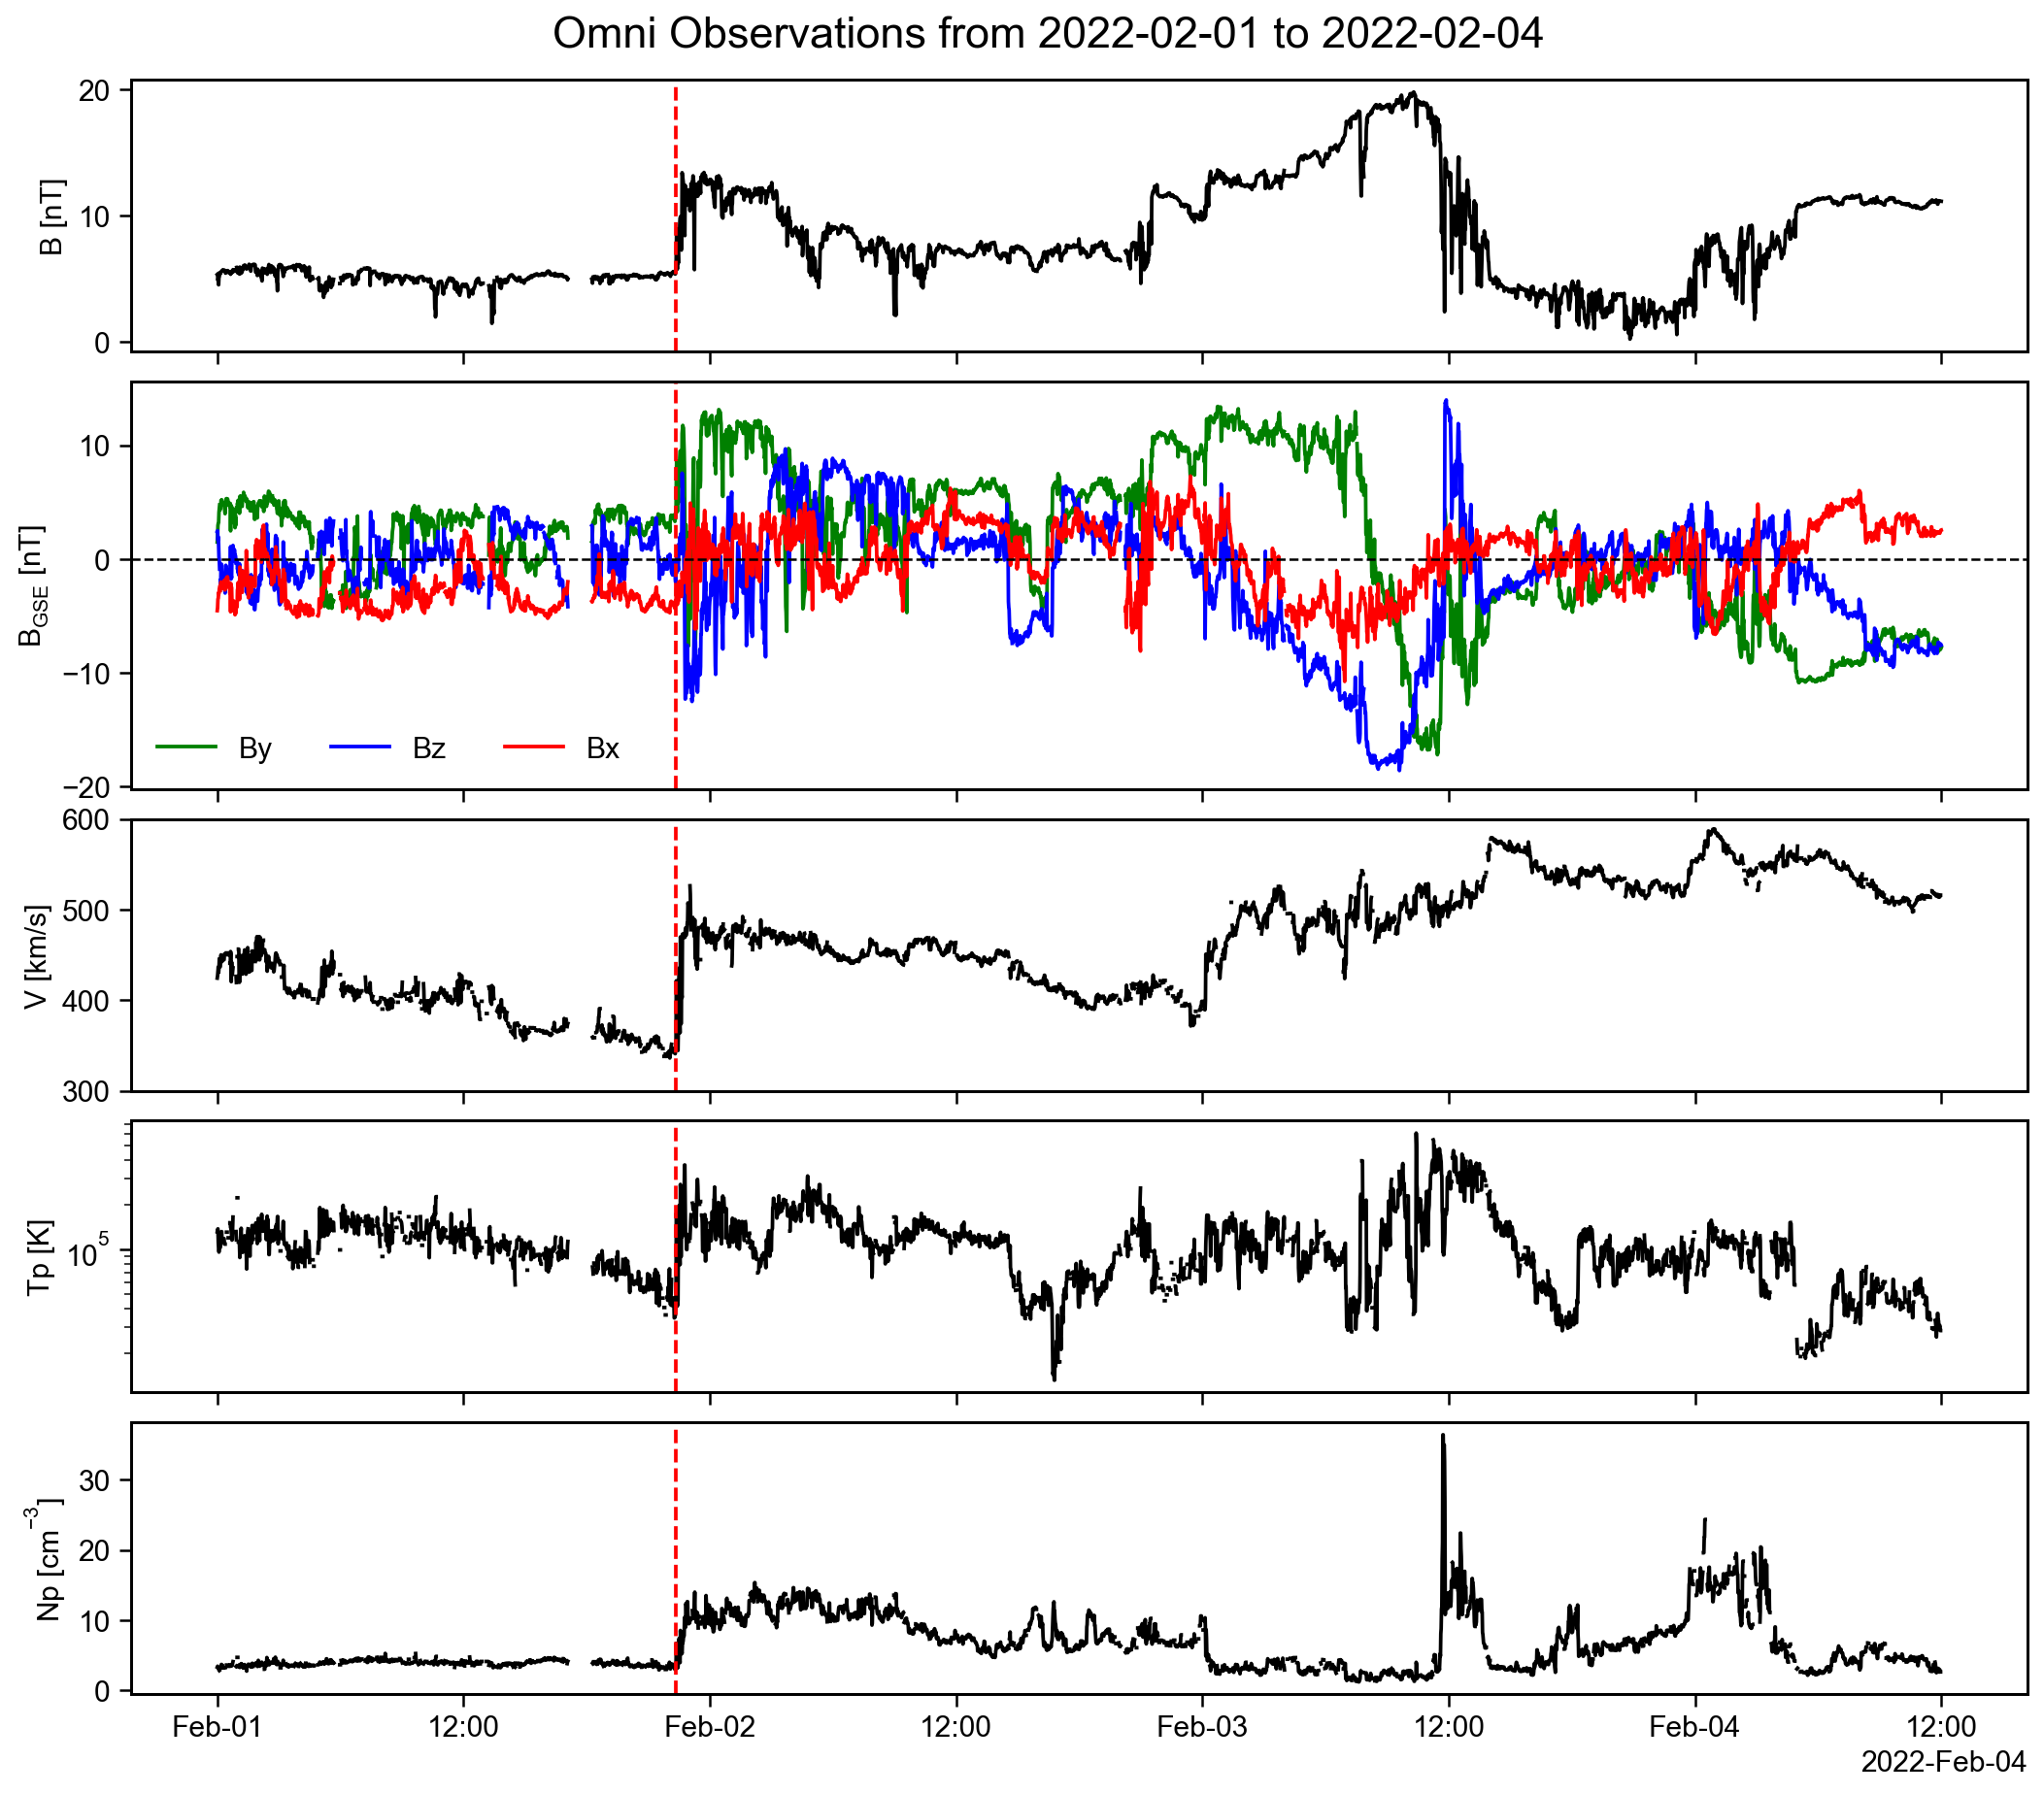

In [72]:
import numpy as np


df['B'] = np.sqrt(df['Bx']**2 + df['By']**2 + df['Bz']**2)
df['V'] = np.sqrt(df['Vx']**2 + df['Vy']**2 + df['Vz']**2)


fig, axs = plt.subplots(5, 1, figsize=(14, 12), sharex=True, gridspec_kw={"hspace":0.1,
                                                                          "height_ratios": [1, 1.5, 1, 1, 1]})

axs[0].plot(df.index, df['B'], color="black")
axs[0].set_ylabel('B [nT]')


axs[1].plot(df.index, df['By'], label='By', color="green")
axs[1].plot(df.index, df['Bz'], label='Bz', color="blue")
axs[1].plot(df.index, df['Bx'], label='Bx', color="red")
axs[1].set_ylabel(r'B$_{GSE}$ [nT]')
axs[1].legend(ncols=3, fontsize=12, loc="lower left", frameon=False)
#axs[1].set_ylim([-5, 5])
axs[1].axhline(0, linestyle="--", color="black", lw=1)

axs[2].plot(df.index, df['V'], color='black')
axs[2].set_ylabel('V [km/s]')
axs[2].set_ylim([300, 600])

axs[3].plot(df.index, df['Tp'], color='black')
axs[3].set_ylabel('Tp [K]')
axs[3].set_yscale("log")

axs[4].plot(df.index, df['np'], color='black')
axs[4].set_ylabel(r'Np [cm$^{-3}$]')

fig.suptitle("Omni Observations from 2022-02-01 to 2022-02-04", fontsize=18, color="black",x=0.5, y=0.91)

for ax in axs.flatten():
    ax.axvline(pd.Timestamp('2022-02-01 22:20'), color="red", linestyle="--")

plt.show()

The ICME is accompanied by a shock that arrives at the Wind spacecraft at 21:27 UT on February 1 (https://lweb.cfa.harvard.edu/shocks/wi_data/00791/wi_00791.html). The shock was also detected by SOHO’s Proton Monitor (Ipavich et al. 1998) at 21:42 UT as can be found in the SOHO shock list: https://space.umd.edu/pm/figs/figs.html. Earth arrival was ~54 minute later.

In [73]:
from scipy.constants import mu_0, k, m_p

# Convert units to SI
B_T = df['B'] * 1e-9          # nT → T
n_m3 = df['np'] * 1e6         # cm⁻³ → m⁻³
T_p  = df['Tp']               # already in K
V_ms = df['V'] * 1e3          # km/s → m/s


# Magnetic pressure
df['P_B'] = 1e9 * B_T**2 / (2 * mu_0)  # in nPa

# Thermal pressure (proton)
df['P_th'] = 1e9 * n_m3 * k * T_p      # in Pa

# Plasma beta
df['beta'] = df['P_th'] / df['P_B']

# Alfvén speed
df['Va'] = B_T / np.sqrt(mu_0 * n_m3 * m_p)  # m/s

# Alfvén Mach number
df['M_A'] = V_ms / df['Va']


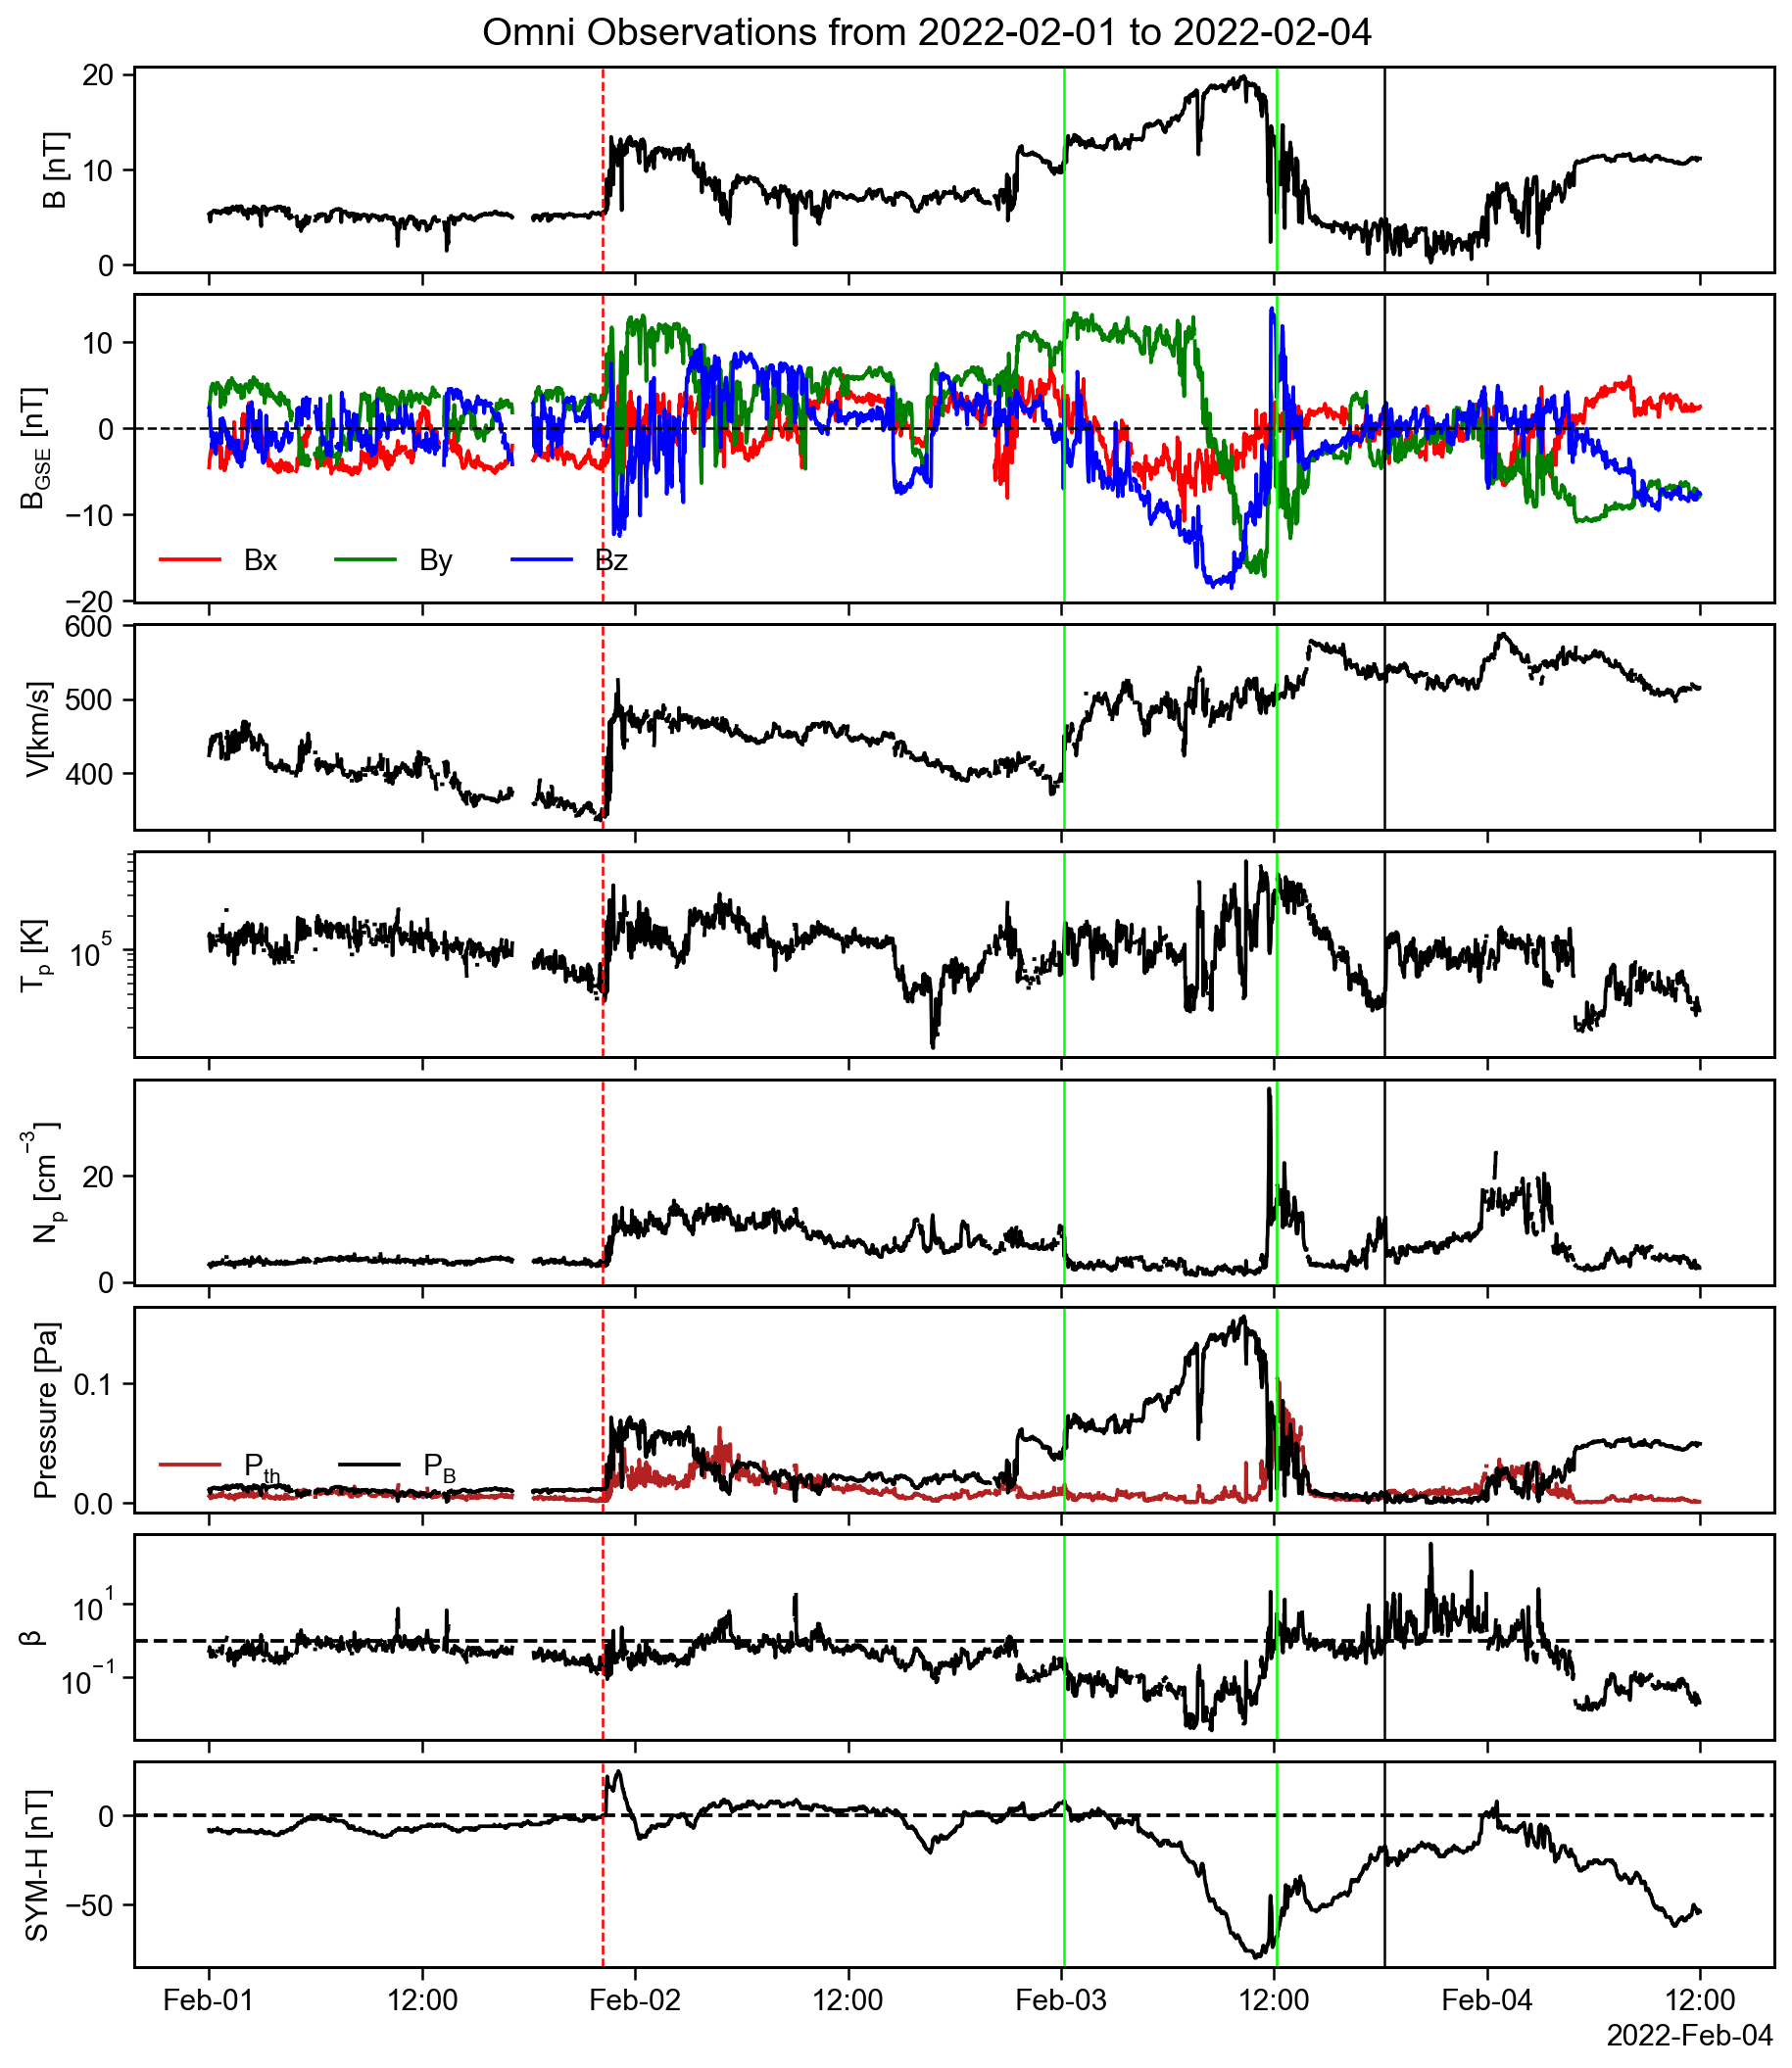

In [74]:
fig, axs = plt.subplots(8, 1, figsize=(12, 14), sharex=True, gridspec_kw={"hspace":0.1,
                                                                "height_ratios": [1, 1.5, 1, 1, 1, 1,1, 1]})

axs[0].plot(df.index, df['B'], color="black")
axs[0].set_ylabel('B [nT]')


axs[1].plot(df.index, df['Bx'], label='Bx', color="red")
axs[1].plot(df.index, df['By'], label='By', color="green")
axs[1].plot(df.index, df['Bz'], label='Bz', color="blue")
axs[1].set_ylabel(r'B$_{GSE}$ [nT]')
axs[1].legend(ncols=3, fontsize=12, loc="lower left", frameon=False)

axs[1].axhline(0, linestyle="--", color="black", lw=1)


axs[2].plot(df.index, df['V'], color='black')
axs[2].set_ylabel('V[km/s]')

axs[3].plot(df.index, df['Tp'], color='black')
axs[3].set_ylabel('T$_p$ [K]')
axs[3].set_yscale("log")


axs[4].plot(df.index, df['np'], color='black')
axs[4].set_ylabel(r'N$_p$ [cm$^{-3}$]')


axs[5].plot(df.index, df['P_th'], label='P$_{th}$', color='firebrick')
axs[5].plot(df.index, df['P_B'], label='P$_B$', color='black')
axs[5].set_ylabel('Pressure [Pa]')
axs[5].legend(loc="lower left", frameon=False, ncols=2)
#axs[5].set_yscale("log")


axs[6].plot(df.index, df['beta'], color='black')
#axs[6].plot(df.index, df['beta_approx'], color='black')
axs[6].set_ylabel(r'$\beta$')
axs[6].set_yscale("log")
axs[6].axhline(1, color="black", linestyle="--")


axs[7].plot(df.index, df['sym-h'], color='black')
axs[7].set_ylabel(r'SYM-H [nT]')
axs[7].axhline(0, color="black", linestyle="--")


fig.suptitle("Omni Observations from 2022-02-01 to 2022-02-04", fontsize=16, color="black",x=0.5, y=0.90)

for ax in axs.flatten():
    ax.axvline(pd.Timestamp('2022-02-01 22:10'), color="red", linestyle="--", lw=1)
    ax.axvline(pd.Timestamp('2022-02-03 00:10'), color="lime", linestyle="-", lw=1)
    ax.axvline(pd.Timestamp('2022-02-03 12:10'), color="lime", linestyle="-", lw=1)
    ax.axvline(pd.Timestamp('2022-02-03 18:13'), color="black", linestyle="-", lw=1)

plt.show()

### ICME Signatures

- $P_{\text{total}}$ enhancement  
- Stronger than ambient magnetic field ($B$)  
- Relatively quiet and smooth rotation in $B$  
- Low plasma beta ($\beta$)  
- Possible geomagnetic storm, quantified by **SYM-H**, depending on the ICME’s magnetic structure and orientation.
